# Capstone Project - BA Track (BFSI)

###                                                 By Gaurav Khare

### PROBLEM STATEMENT

In the recent past, the industry of wealth management has seen a lot of growth. Every individual or business actively searches for opportunities to get the maximum returns. However, in most of the cases, they either lack the skills to identify the right investment opportunity, or there is a shortage of time for finding these opportunities. Hence, this gave rise to the dedicated individuals who perform this task on behalf of the investors for a commission - Portfolio managers.

 

A portfolio manager makes investment decisions and carries out other related activities on behalf of vested investors. They work with a team of analysts and researchers, and their main objective is to realise the needs of the investor and suggest a suitable portfolio that meets all the expectations. They are responsible for establishing the best investment strategy, selecting appropriate investments along with the right allocation. However, in doing so, they face a lot of competition in the form of other portfolio managers and rival firms. Therefore, the portfolio manager has to use the available resources to provide the best solution to the investor.

 

Consider yourself working for an associate at an investment firm that manages accounts for private clients. Your role requires you to analyse a portfolio of stocks to provide consultation on investment management based on client’s requirement. Let us now understand the terms involved in the entire process.

## Part 1 :- Importing Libraries

In [1]:
# importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)

import math
from scipy import stats

## Part 2 :- Importing, Cleaning & Exploratory Data Analysis
### Step 1 :- Importing Data

####  Importing all the CSV Files 

In [2]:
# Importing Csv files of the companies from the Aviation Industry

American_Airlines_Group_Inc = pd.read_csv('Aviation/AAL.csv',parse_dates=['Date'])
Alaska_Air_Group_Inc = pd.read_csv('Aviation\ALK.csv',parse_dates=['Date'])
Hawaiian_Holdings_Inc = pd.read_csv('Aviation\HA.csv',parse_dates=['Date'])

In [3]:
# Importing Csv files of the companies from the Finance Industry

Credit_Suisse = pd.read_csv('Finance\CS.csv',parse_dates=['Date'])
Deutsche_Bank = pd.read_csv('Finance\DB.csv',parse_dates=['Date'])
Goldman_Sachs = pd.read_csv('Finance\GS.csv',parse_dates=['Date'])

In [4]:
# Importing Csv files of the companies from the Healthcare_Pharma Industry

JohnsonnJohnson = pd.read_csv('Healthcare_Pharma\JNJ.csv',parse_dates=['Date'])
Merck_and_CO_inc = pd.read_csv('Healthcare_Pharma\MRK.csv',parse_dates=['Date'])
Bausch_Health_Companies_inc = pd.read_csv('Healthcare_Pharma\BHC.csv',parse_dates=['Date'])

In [5]:
# Importing Csv files of the companies from the Technology Industry

Apple_Inc = pd.read_csv('Technology\AAPL.csv',parse_dates=['Date'])
Amazon = pd.read_csv('Technology\AMZN.csv',parse_dates=['Date'])
Alphabet = pd.read_csv('Technology\GOOG.csv',parse_dates=['Date'])

In [6]:
# Importing Csv file of the market reference (S&P500)

SP500 = pd.read_csv('S&P500.csv',parse_dates=['Date'])

#### Adding suffix to the columns of the dataframe for distinguishing

In [7]:
#colm=['Date']
American_Airlines_Group_Inc.columns = American_Airlines_Group_Inc.columns.map(lambda x : x + '_aal' if x !='Date'else x)
Alaska_Air_Group_Inc.columns = Alaska_Air_Group_Inc.columns.map(lambda x : x + '_alk' if x !='Date'else x)
Hawaiian_Holdings_Inc.columns = Hawaiian_Holdings_Inc.columns.map(lambda x : x + '_ha' if x !='Date'else x)
Credit_Suisse.columns = Credit_Suisse.columns.map(lambda x : x + '_cs' if x !='Date'else x)
Deutsche_Bank.columns = Deutsche_Bank.columns.map(lambda x : x + '_db' if x !='Date'else x)
Goldman_Sachs.columns = Goldman_Sachs.columns.map(lambda x : x + '_gs' if x !='Date'else x)
Bausch_Health_Companies_inc.columns = Bausch_Health_Companies_inc.columns.map(lambda x : x + '_bhc' if x !='Date'else x)
JohnsonnJohnson.columns = JohnsonnJohnson.columns.map(lambda x : x + '_jnj' if x !='Date'else x)
Merck_and_CO_inc.columns = Merck_and_CO_inc.columns.map(lambda x : x + '_mrk' if x !='Date'else x)
Apple_Inc.columns = Apple_Inc.columns.map(lambda x : x + '_aapl' if x !='Date'else x)
Amazon.columns = Amazon.columns.map(lambda x : x + '_amzn' if x !='Date'else x)
Alphabet.columns =  Alphabet.columns.map(lambda x : x + '_goog' if x !='Date'else x)
SP500.columns =SP500.columns.map(lambda x : x + '_sp500' if x !='Date'else x)

In [8]:
# aal['Date'] = pd.to_datetime(aal['Date'],dayfirst = True)
# aal = aal.set_index('Date')
# aal.head()

#### Finding missing values in all the dataframes

In [9]:
print(American_Airlines_Group_Inc.isnull().sum()),print(Alaska_Air_Group_Inc.isnull().sum()),print(Hawaiian_Holdings_Inc.isnull().sum()),
print(Credit_Suisse.isnull().sum()),print(Deutsche_Bank.isnull().sum()),print(Goldman_Sachs.isnull().sum()),
print(Bausch_Health_Companies_inc.isnull().sum()),print(JohnsonnJohnson.isnull().sum()),print(Merck_and_CO_inc.isnull().sum()),
print(Apple_Inc.isnull().sum()),print(Amazon.isnull().sum()),print(Alphabet.isnull().sum()),
print(SP500.isnull().sum())


Date             0
Open_aal         0
High_aal         0
Low_aal          0
Close_aal        0
Adj Close_aal    0
Volume_aal       0
dtype: int64
Date             7
Open_alk         7
High_alk         7
Low_alk          7
Close_alk        7
Adj Close_alk    7
Volume_alk       7
dtype: int64
Date            7
Open_ha         7
High_ha         7
Low_ha          7
Close_ha        7
Adj Close_ha    7
Volume_ha       7
dtype: int64
Date            7
Open_cs         7
High_cs         7
Low_cs          7
Close_cs        7
Adj Close_cs    7
Volume_cs       7
dtype: int64
Date            7
Open_db         7
High_db         7
Low_db          7
Close_db        7
Adj Close_db    7
Volume_db       7
dtype: int64
Date            7
Open_gs         7
High_gs         7
Low_gs          7
Close_gs        7
Adj Close_gs    7
Volume_gs       7
dtype: int64
Date             8
Open_bhc         8
High_bhc         8
Low_bhc          8
Close_bhc        8
Adj Close_bhc    8
Volume_bhc       8
dtype: int64
Date  

In [10]:
aviation_dataset=['American_Airlines_Group_Inc','Alaska_Air_Group_Inc','Hawaiian_Holdings_Inc']
finance_dataset=['Credit_Suisse','Deutsche_Bank','Goldman_Sachs']
healthcare_dataset=['Bausch_Health_Companies_inc','JohnsonnJohnson','Merck_and_CO_inc']
technology_dataset=['Apple_Inc','Amazon','Alphabet']

In [11]:
#Merging the dataframes of Aviation Industry and inspecting the dataframe
aviation  = American_Airlines_Group_Inc.merge(Alaska_Air_Group_Inc, on='Date',how='inner').merge(Hawaiian_Holdings_Inc, on='Date',how='inner')
finance = Credit_Suisse.merge(Deutsche_Bank, on='Date',how='inner').merge(Goldman_Sachs, on='Date',how='inner')
healthcare =  Bausch_Health_Companies_inc.merge(JohnsonnJohnson, on='Date',how='outer').merge(Merck_and_CO_inc, on='Date',how='outer')
technology = Apple_Inc.merge(Amazon, on='Date',how='inner').merge(Alphabet, on='Date',how='inner') 

#### Merging all the dataframes including the Market Reference (S&P500)

In [12]:
#Merging all the dataframes including the Market Reference (S&P500)
portfolio=aviation.merge(finance, on='Date',how='inner').merge(healthcare, on='Date',how='inner').merge(technology,on='Date',how='inner').merge(SP500,on='Date',how='inner')
portfolio.head()

Date  Open_aal  High_aal  Low_aal  Close_aal  Adj Close_aal  Volume_aal  Open_alk  High_alk  Low_alk  Close_alk  Adj Close_alk  Volume_alk  Open_ha  High_ha  Low_ha  Close_ha  Adj Close_ha  Volume_ha    Open_cs    High_cs     Low_cs   Close_cs  Adj Close_cs  Volume_cs    Open_db    High_db     Low_db   Close_db  Adj Close_db  Volume_db     Open_gs     High_gs      Low_gs    Close_gs  Adj Close_gs  Volume_gs   Open_bhc   High_bhc    Low_bhc  Close_bhc  Adj Close_bhc  Volume_bhc  \
0 2010-01-10      9.29      9.39     9.21       9.29       8.758067     3603800   12.9325   12.9625  12.3675    12.4475      10.972344   1663600.0     6.02     6.05    5.88      5.96      5.742526   645400.0  41.835938  42.285156  41.562500  42.226563     30.167257  1814900.0  52.585876  52.862595  52.003819  52.595421     44.981487  2010600.0  145.199997  148.500000  144.820007  147.699997    127.147858  7439800.0  25.120001  25.879999  25.100000  25.750000      24.757708   5778700.0   
1 2010-04-10      9.24      9.48     9.05       9.12       8.597802     3856800   12.4300   12.5900  11.9975    12.1425      10.703489   1512400.0     5.96     6.00    5.73      5.75      5.540189   618900.0  42.265625  42.431641  41.582031  41.914063     29.943998  1085600.0  52.204197  52.604961  51.412212  51.755726     44.263348  1245600.0  147.699997  148.470001  144.699997  146.570007    126.175117  5866700.0  25.750000  25.990000  25.590000  25.870001      24.873083   4187200.0   
2 2010-05-10      9.27      9.35     9.15       9.23       8.701504     3896600   12.2600   12.2850  11.9450    12.2150      10.767396   2567200.0     5.82     5.93    5.77      5.85      5.636539   534800.0  42.607422  43.427734  42.509766  43.154297     30.830046  1025300.0  52.891220  54.427483  52.795803  53.950382     46.140301  2270900.0  147.559998  150.279999  146.070007  149.570007    128.757706  8724700.0  26.040001  26.330000  25.830000  26.299999      25.286512   4610300.0   
3 2010-06-10      9.27      9.40     9.15       9.23       8.701504     3230200   12.2200   12.3950  12.0875    12.1875      10.743157   1043600.0     5.85     6.05    5.85      5.97      5.752162  2563900.0  43.496094  43.701172  43.330078  43.437500     31.032362   871300.0  54.723282  54.971375  54.398853  54.608780     46.703384  1887400.0  149.750000  152.330002  149.130005  150.839996    129.850906  6330600.0  26.150000  26.879999  26.049999  26.690001      25.661484   4448900.0   
4 2010-07-10      9.30      9.31     9.07       9.24       8.710930     3877700   12.2775   12.3450  11.2150    11.6250      10.247319   7682400.0     6.04     6.32    5.98      6.15      5.925593  1115200.0  43.916016  44.228516  43.398438  43.671875     31.199810  1377000.0  55.162212  55.162212  53.721375  54.036259     46.213741  1191000.0  152.110001  152.360001  150.029999  151.110001    130.083435  4471500.0  26.700001  26.910000  26.440001  26.600000      25.574951   2453900.0   

    Open_jnj   High_jnj    Low_jnj  Close_jnj  Adj Close_jnj  Volume_jnj   Open_mrk   High_mrk    Low_mrk  Close_mrk  Adj Close_mrk  Volume_mrk  Open_aapl  High_aapl   Low_aapl  Close_aapl  Adj Close_aapl  Volume_aapl   Open_amzn   High_amzn    Low_amzn  Close_amzn  Adj Close_amzn  Volume_amzn   Open_goog   High_goog    Low_goog  Close_goog  Adj Close_goog  Volume_goog   Open_sp500   High_sp500    Low_sp500  Close_sp500  Adj Close_sp500  Volume_sp500  
0  62.090000  62.250000  61.570000  61.750000      45.970119   9773200.0  36.759998  36.840000  36.349998  36.599998      26.052284  11741900.0  10.219643  10.235000  10.048214   10.090000        8.719163    448142800  157.080002  157.440002  152.199997  153.710007      153.710007    8683400.0  264.010437  264.319275  260.523499  261.828613      261.828613    4466600.0  1143.489990  1150.300049  1139.420044  1146.239990      1146.239990    4298910000  
1  61.540001  61.980000  61.299999  61.669998      45.910553   8703600.0  36.490002  36.750000  36.290001  36.520000      25.995331   9

In [13]:
#Removing the duplicate columns from the dataset
portfolio = portfolio.loc[:,~portfolio.columns.duplicated()]

### Data Inspection

In [14]:
#checking total rows and cols in dataset
portfolio.shape

(2517, 79)

In [15]:
#Determing the information and datatyes of the data set
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2517 non-null   datetime64[ns]
 1   Open_aal         2517 non-null   float64       
 2   High_aal         2517 non-null   float64       
 3   Low_aal          2517 non-null   float64       
 4   Close_aal        2517 non-null   float64       
 5   Adj Close_aal    2517 non-null   float64       
 6   Volume_aal       2517 non-null   int64         
 7   Open_alk         2517 non-null   float64       
 8   High_alk         2517 non-null   float64       
 9   Low_alk          2517 non-null   float64       
 10  Close_alk        2517 non-null   float64       
 11  Adj Close_alk    2517 non-null   float64       
 12  Volume_alk       2517 non-null   float64       
 13  Open_ha          2517 non-null   float64       
 14  High_ha          2517 non-null   float64

In [16]:
# finding the different column headers in the  dataset.
portfolio.columns

Index(['Date', 'Open_aal', 'High_aal', 'Low_aal', 'Close_aal', 'Adj Close_aal', 'Volume_aal', 'Open_alk', 'High_alk', 'Low_alk', 'Close_alk', 'Adj Close_alk', 'Volume_alk', 'Open_ha', 'High_ha', 'Low_ha', 'Close_ha', 'Adj Close_ha', 'Volume_ha', 'Open_cs', 'High_cs', 'Low_cs', 'Close_cs', 'Adj Close_cs', 'Volume_cs', 'Open_db', 'High_db', 'Low_db', 'Close_db', 'Adj Close_db', 'Volume_db', 'Open_gs', 'High_gs', 'Low_gs', 'Close_gs', 'Adj Close_gs', 'Volume_gs', 'Open_bhc', 'High_bhc', 'Low_bhc',
       'Close_bhc', 'Adj Close_bhc', 'Volume_bhc', 'Open_jnj', 'High_jnj', 'Low_jnj', 'Close_jnj', 'Adj Close_jnj', 'Volume_jnj', 'Open_mrk', 'High_mrk', 'Low_mrk', 'Close_mrk', 'Adj Close_mrk', 'Volume_mrk', 'Open_aapl', 'High_aapl', 'Low_aapl', 'Close_aapl', 'Adj Close_aapl', 'Volume_aapl', 'Open_amzn', 'High_amzn', 'Low_amzn', 'Close_amzn', 'Adj Close_amzn', 'Volume_amzn', 'Open_goog', 'High_goog', 'Low_goog', 'Close_goog', 'Adj Close_goog', 'Volume_goog', 'Open_sp500', 'High_sp500',
       '

In [17]:
#Checking for the missing values in the dataset
portfolio.isna().sum()

Date               0
Open_aal           0
High_aal           0
Low_aal            0
Close_aal          0
Adj Close_aal      0
Volume_aal         0
Open_alk           0
High_alk           0
Low_alk            0
Close_alk          0
Adj Close_alk      0
Volume_alk         0
Open_ha            0
High_ha            0
Low_ha             0
Close_ha           0
Adj Close_ha       0
Volume_ha          0
Open_cs            0
High_cs            0
Low_cs             0
Close_cs           0
Adj Close_cs       0
Volume_cs          0
Open_db            0
High_db            0
Low_db             0
Close_db           0
Adj Close_db       0
Volume_db          0
Open_gs            0
High_gs            0
Low_gs             0
Close_gs           0
Adj Close_gs       0
Volume_gs          0
Open_bhc           0
High_bhc           0
Low_bhc            0
Close_bhc          0
Adj Close_bhc      0
Volume_bhc         0
Open_jnj           0
High_jnj           0
Low_jnj            0
Close_jnj          0
Adj Close_jnj

In [18]:
portfolio.to_csv("portfolio_final_dataset.csv")

In [19]:
# Selecting Close Price ofthe different column headers in the  dataset.
price_columns =  portfolio.columns[portfolio.columns.str.contains('Close')]
price_columns

Index(['Close_aal', 'Adj Close_aal', 'Close_alk', 'Adj Close_alk', 'Close_ha', 'Adj Close_ha', 'Close_cs', 'Adj Close_cs', 'Close_db', 'Adj Close_db', 'Close_gs', 'Adj Close_gs', 'Close_bhc', 'Adj Close_bhc', 'Close_jnj', 'Adj Close_jnj', 'Close_mrk', 'Adj Close_mrk', 'Close_aapl', 'Adj Close_aapl', 'Close_amzn', 'Adj Close_amzn', 'Close_goog', 'Adj Close_goog', 'Close_sp500', 'Adj Close_sp500'], dtype='object')

In [20]:
portfolio_price=portfolio[['Date','Close_aal','Close_alk','Close_ha','Close_cs','Close_db','Close_gs',
                    'Close_bhc','Close_jnj','Close_mrk','Close_aapl','Close_amzn','Close_goog','Close_sp500']]

In [21]:
portfolio_price.round(2).head()

Date  Close_aal  Close_alk  Close_ha  Close_cs  Close_db  Close_gs  Close_bhc  Close_jnj  Close_mrk  Close_aapl  Close_amzn  Close_goog  Close_sp500
0 2010-01-10       9.29      12.45      5.96     42.23     52.60    147.70      25.75      61.75      36.60       10.09      153.71      261.83      1146.24
1 2010-04-10       9.12      12.14      5.75     41.91     51.76    146.57      25.87      61.67      36.52        9.95      155.39      260.20      1137.03
2 2010-05-10       9.23      12.22      5.85     43.15     53.95    149.57      26.30      62.80      37.02       10.32      160.87      268.11      1160.75
3 2010-06-10       9.23      12.19      5.97     43.44     54.61    150.84      26.69      63.21      37.01       10.33      155.40      266.18      1159.97
4 2010-07-10       9.24      11.62      6.15     43.67     54.04    151.11      26.60      63.22      36.71       10.33      156.27      264.02      1158.06

In [22]:
# Selecting Volume of the different column headers in the  dataset.
vol_columns =  portfolio.columns[portfolio.columns.str.contains('Volume')]
vol_columns

Index(['Volume_aal', 'Volume_alk', 'Volume_ha', 'Volume_cs', 'Volume_db', 'Volume_gs', 'Volume_bhc', 'Volume_jnj', 'Volume_mrk', 'Volume_aapl', 'Volume_amzn', 'Volume_goog', 'Volume_sp500'], dtype='object')

In [23]:
portfolio_vol=portfolio[['Date','Volume_aapl', 'Volume_amzn', 'Volume_goog', 'Volume_sp500',
       'Volume_aal', 'Volume_alk', 'Volume_ha', 'Volume_cs', 'Volume_db',
       'Volume_gs', 'Volume_bhc', 'Volume_jnj', 'Volume_mrk']]

In [24]:
portfolio_vol.head()

Date  Volume_aapl  Volume_amzn  Volume_goog  Volume_sp500  Volume_aal  Volume_alk  Volume_ha  Volume_cs  Volume_db  Volume_gs  Volume_bhc  Volume_jnj  Volume_mrk
0 2010-01-10    448142800    8683400.0    4466600.0    4298910000     3603800   1663600.0   645400.0  1814900.0  2010600.0  7439800.0   5778700.0   9773200.0  11741900.0
1 2010-04-10    435302000    5346500.0    3895400.0    3604110000     3856800   1512400.0   618900.0  1085600.0  1245600.0  5866700.0   4187200.0   8703600.0   9234900.0
2 2010-05-10    501967200    5620000.0    7040400.0    4068840000     3896600   2567200.0   534800.0  1025300.0  2270900.0  8724700.0   4610300.0  12439400.0  10669200.0
3 2010-06-10    670868800    6060800.0    5545200.0    4073160000     3230200   1043600.0  2563900.0   871300.0  1887400.0  6330600.0   4448900.0  11339800.0   7541300.0
4 2010-07-10    408399600    4622000.0    4809400.0    3910550000     3877700   7682400.0  1115200.0  1377000.0  1191000.0  4471500.0   2453900.0   9826600.0  13897800.0

In [25]:
# Converting the Date column into index for exploring the data and inspecting
#portfolio_price['Date'] = pd.to_datetime(portfolio_price['Date'])
portfolio_price= portfolio_price.set_index('Date')
portfolio_price.round(2).head()

Close_aal  Close_alk  Close_ha  Close_cs  Close_db  Close_gs  Close_bhc  Close_jnj  Close_mrk  Close_aapl  Close_amzn  Close_goog  Close_sp500
Date                                                                                                                                                      
2010-01-10       9.29      12.45      5.96     42.23     52.60    147.70      25.75      61.75      36.60       10.09      153.71      261.83      1146.24
2010-04-10       9.12      12.14      5.75     41.91     51.76    146.57      25.87      61.67      36.52        9.95      155.39      260.20      1137.03
2010-05-10       9.23      12.22      5.85     43.15     53.95    149.57      26.30      62.80      37.02       10.32      160.87      268.11      1160.75
2010-06-10       9.23      12.19      5.97     43.44     54.61    150.84      26.69      63.21      37.01       10.33      155.40      266.18      1159.97
2010-07-10       9.24      11.62      6.15     43.67     54.04    151.11      26.60      63.22      36.71       10.33      156.27      264.02      1158.06

In [26]:
# Converting the Date column into index for exploring the data and inspecting
# portfolio_vol['Date'] = pd.to_datetime(portfolio_vol['Date'])
portfolio_vol = portfolio_vol.set_index('Date')
portfolio_vol.head()

Volume_aapl  Volume_amzn  Volume_goog  Volume_sp500  Volume_aal  Volume_alk  Volume_ha  Volume_cs  Volume_db  Volume_gs  Volume_bhc  Volume_jnj  Volume_mrk
Date                                                                                                                                                                   
2010-01-10    448142800    8683400.0    4466600.0    4298910000     3603800   1663600.0   645400.0  1814900.0  2010600.0  7439800.0   5778700.0   9773200.0  11741900.0
2010-04-10    435302000    5346500.0    3895400.0    3604110000     3856800   1512400.0   618900.0  1085600.0  1245600.0  5866700.0   4187200.0   8703600.0   9234900.0
2010-05-10    501967200    5620000.0    7040400.0    4068840000     3896600   2567200.0   534800.0  1025300.0  2270900.0  8724700.0   4610300.0  12439400.0  10669200.0
2010-06-10    670868800    6060800.0    5545200.0    4073160000     3230200   1043600.0  2563900.0   871300.0  1887400.0  6330600.0   4448900.0  11339800.0   7541300.0
2010-07-10    408399600    4622000.0    4809400.0    3910550000     3877700   7682400.0  1115200.0  1377000.0  1191000.0  4471500.0   2453900.0   9826600.0  13897800.0

In [27]:
#Checking for the missing values in the dataset
portfolio_price.isnull().sum()

Close_aal      0
Close_alk      0
Close_ha       0
Close_cs       0
Close_db       0
Close_gs       0
Close_bhc      0
Close_jnj      0
Close_mrk      0
Close_aapl     0
Close_amzn     0
Close_goog     0
Close_sp500    0
dtype: int64

In [28]:
# Dropping the rows with missing values
portfolio_price = portfolio_price.dropna(axis=0)
portfolio_price.head()

Close_aal  Close_alk  Close_ha   Close_cs   Close_db    Close_gs  Close_bhc  Close_jnj  Close_mrk  Close_aapl  Close_amzn  Close_goog  Close_sp500
Date                                                                                                                                                          
2010-01-10       9.29    12.4475      5.96  42.226563  52.595421  147.699997  25.750000  61.750000  36.599998   10.090000  153.710007  261.828613  1146.239990
2010-04-10       9.12    12.1425      5.75  41.914063  51.755726  146.570007  25.870001  61.669998  36.520000    9.951428  155.389999  260.199707  1137.030029
2010-05-10       9.23    12.2150      5.85  43.154297  53.950382  149.570007  26.299999  62.799999  37.020000   10.319285  160.869995  268.110046  1160.750000
2010-06-10       9.23    12.1875      5.97  43.437500  54.608780  150.839996  26.690001  63.209999  37.009998   10.328215  155.399994  266.177307  1159.969971
2010-07-10       9.24    11.6250      6.15  43.671875  54.036259  151.110001  26.600000  63.220001  36.709999   10.329286  156.270004  264.015411  1158.060059

In [29]:
#checking total rows and cols in dataset
portfolio_price.shape

(2517, 13)

In [30]:
#Checking for the missing values in the dataset
portfolio_price.isnull().sum()

Close_aal      0
Close_alk      0
Close_ha       0
Close_cs       0
Close_db       0
Close_gs       0
Close_bhc      0
Close_jnj      0
Close_mrk      0
Close_aapl     0
Close_amzn     0
Close_goog     0
Close_sp500    0
dtype: int64

In [31]:
# Dropping the rows with missing values
portfolio_vol = portfolio_vol.dropna(axis=0)
portfolio_vol.head()

Volume_aapl  Volume_amzn  Volume_goog  Volume_sp500  Volume_aal  Volume_alk  Volume_ha  Volume_cs  Volume_db  Volume_gs  Volume_bhc  Volume_jnj  Volume_mrk
Date                                                                                                                                                                   
2010-01-10    448142800    8683400.0    4466600.0    4298910000     3603800   1663600.0   645400.0  1814900.0  2010600.0  7439800.0   5778700.0   9773200.0  11741900.0
2010-04-10    435302000    5346500.0    3895400.0    3604110000     3856800   1512400.0   618900.0  1085600.0  1245600.0  5866700.0   4187200.0   8703600.0   9234900.0
2010-05-10    501967200    5620000.0    7040400.0    4068840000     3896600   2567200.0   534800.0  1025300.0  2270900.0  8724700.0   4610300.0  12439400.0  10669200.0
2010-06-10    670868800    6060800.0    5545200.0    4073160000     3230200   1043600.0  2563900.0   871300.0  1887400.0  6330600.0   4448900.0  11339800.0   7541300.0
2010-07-10    408399600    4622000.0    4809400.0    3910550000     3877700   7682400.0  1115200.0  1377000.0  1191000.0  4471500.0   2453900.0   9826600.0  13897800.0

In [32]:
#checking total rows and cols in dataset
portfolio_vol.shape

(2517, 13)

In [33]:
#Determing the basic statistical parameters of the data set
portfolio.describe()

Open_aal     High_aal      Low_aal    Close_aal  Adj Close_aal    Volume_aal     Open_alk     High_alk      Low_alk    Close_alk  Adj Close_alk    Volume_alk      Open_ha      High_ha       Low_ha     Close_ha  Adj Close_ha     Volume_ha      Open_cs      High_cs       Low_cs     Close_cs  Adj Close_cs     Volume_cs      Open_db      High_db       Low_db     Close_db  Adj Close_db     Volume_db      Open_gs      High_gs       Low_gs     Close_gs  Adj Close_gs     Volume_gs  \
count  2517.000000  2517.000000  2517.000000  2517.000000    2517.000000  2.517000e+03  2517.000000  2517.000000  2517.000000  2517.000000    2517.000000  2.517000e+03  2517.000000  2517.000000  2517.000000  2517.000000   2517.000000  2.517000e+03  2517.000000  2517.000000  2517.000000  2517.000000   2517.000000  2.517000e+03  2517.000000  2517.000000  2517.000000  2517.000000   2517.000000  2.517000e+03  2517.000000  2517.000000  2517.000000  2517.000000   2517.000000  2.517000e+03   
mean     29.419932    29.893743    28.932447    29.397636      28.332638  1.263146e+07    50.047186    50.697005    49.362837    50.031176      46.889544  1.648085e+06    22.884056    23.287282    22.475161    22.870413     22.182312  9.365502e+05    21.509947    21.669869    21.327741    21.501379     17.507931  2.476788e+06    27.316815    27.560722    27.031801    27.304930     25.029328  3.677383e+06   179.600068   181.383846   177.825284   179.598184    166.665287  3.833079e+06   
std      15.211082    15.368377    15.046234    15.211889      14.712407  2.149322e+07    24.189029    24.433428    23.940427    24.187020      23.293159  1.095121e+06    15.490954    15.723554    15.270538    15.483034     14.964163  6.485618e+05     8.993599     9.044728     8.926825     8.988043      5.732890  1.847826e+06    15.417764    15.540430    15.262247    15.409974     13.191191  3.553901e+06    42.472256    42.657155    42.206770    42.405475     43.999974  2.187223e+06   
min       3.990000     4.060000     3.960000     4.000000       3.770966  1.158400e+06    11.655000    11.882500    11.215000    11.620000      10.242908  2.706000e+05     3.730000     3.880000     3.670000     3.780000      3.642072  1.205000e+05     6.550000     6.860000     6.470000     6.670000      6.552680  2.050000e+05     5.030000     5.680000     4.990000     5.480000      5.480000  0.000000e+00    88.059998    89.279999    84.269997    87.699997     76.414085  4.677000e+05   
25%      12.970000    13.340000    12.630000    13.010000      12.560000  5.368800e+06    26.955000    27.865000    26.045000    26.780001      24.650858  1.087600e+06     7.020000     7.120000     6.890000     7.030000      6.773483  5.395000e+05    13.710000    13.850000    13.630000    13.740000     12.715983  1.275300e+06    13.510000    13.630000    13.360000    13.470000     12.953422  1.527400e+06   155.169998   156.690002   153.449997   154.990005    139.162918  2.443200e+06   
50%      32.610001    33.299999    32.020000    32.520000      31.816221  7.405700e+06    58.459999    59.060001    57.720001    58.540001      55.455898  1.399400e+06    21.910000    22.230000    21.280001    21.910000     21.120163  7.699000e+05    19.750000    19.850000    19.340000    19.639999     16.708580  2.020700e+06    28.360001    28.700001    28.000000    28.370001     26.462519  2.767400e+06   177.729996   179.070007   175.710007   177.229996    164.142197  3.243900e+06   
75%      42.169998    42.740002    41.599998    42.200001      40.423805  1.078520e+07    67.290001    68.000000    66.500000    67.260002      64.511078  1.880800e+06    37.049999    37.599998    36.330002    36.900002     35.708328  1.133000e+06    27.760000    27.920000    27.558594    27.750000     21.744936  3.124000e+06    40.992367    41.450382    40.591602    41.049618     36.699535  4.697800e+06   211.610001   213.809998   209.720001   211.580002    204.169312  4.587600e+06   
max      58.790001    59.080002    57.799999    58.470001      56.988728  4.286171

In [34]:
#Determing the basic statistical parameters of the data set
portfolio_price.describe()

Close_aal    Close_alk     Close_ha     Close_cs     Close_db     Close_gs    Close_bhc    Close_jnj    Close_mrk   Close_aapl   Close_amzn   Close_goog  Close_sp500
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000
mean     29.397636    50.031176    22.870413    21.501379    27.304930   179.598184    61.880687   105.277378    57.161053    33.454670   854.636107   730.426139  2111.392732
std      15.211889    24.187020    15.483034     8.988043    15.409974    42.405475    57.170002    28.174233    15.164505    20.630118   745.201139   364.685720   612.227235
min       4.000000    11.620000     3.780000     6.670000     5.480000    87.699997     8.510000    57.660000    29.809999     9.951428   153.029999   236.553345  1099.229980
25%      13.010000    26.780001     7.030000    13.740000    13.470000   154.990005    22.170000    81.930000    45.730000    18.961428   266.489990   403.642059  1562.170044
50%      32.520000    58.540001    21.910000    19.639999    28.370001   177.229996    38.759998   104.040001    57.180000    27.592501   533.750000   651.789978  2071.219971
75%      42.200001    67.260002    36.900002    27.750000    41.049618   211.580002    90.269997   130.979996    64.089996    42.962502  1500.000000  1055.810059  2656.300049
max      58.470001   100.239998    60.299999    46.513672    62.624046   273.380005   262.519989   155.509995    92.040001   134.179993  3531.449951  1728.280029  3580.840088

In [35]:
#Determing the basic statistical parameters of the data set
portfolio_vol.describe()

Volume_aapl   Volume_amzn   Volume_goog  Volume_sp500    Volume_aal    Volume_alk     Volume_ha     Volume_cs     Volume_db     Volume_gs    Volume_bhc    Volume_jnj    Volume_mrk
count  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03  2.517000e+03
mean   2.635459e+08  4.326001e+06  2.951427e+06  3.739228e+09  1.263146e+07  1.648085e+06  9.365502e+05  2.476788e+06  3.677383e+06  3.833079e+06  7.194057e+06  8.605432e+06  1.193947e+07
std    2.037493e+08  2.410250e+06  2.460964e+06  8.805742e+08  2.149322e+07  1.095121e+06  6.485618e+05  1.847826e+06  3.553901e+06  2.187223e+06  1.121985e+07  4.493037e+06  6.218030e+06
min    3.247000e+07  8.813000e+05  7.900000e+03  1.025000e+09  1.158400e+06  2.706000e+05  1.205000e+05  2.050000e+05  0.000000e+00  4.677000e+05  3.803000e+05  2.353800e+06  2.235900e+06
25%    1.180676e+08  2.769400e+06  1.393000e+06  3.241030e+09  5.368800e+06  1.087600e+06  5.395000e+05  1.275300e+06  1.527400e+06  2.443200e+06  1.677300e+06  5.959500e+06  8.222000e+06
50%    1.935080e+08  3.710900e+06  2.030500e+06  3.591270e+09  7.405700e+06  1.399400e+06  7.699000e+05  2.020700e+06  2.767400e+06  3.243900e+06  3.203800e+06  7.737300e+06  1.055070e+07
75%    3.505768e+08  5.111000e+06  3.966700e+06  4.060610e+09  1.078520e+07  1.880800e+06  1.133000e+06  3.124000e+06  4.697800e+06  4.587600e+06  7.874000e+06  1.002030e+07  1.369570e+07
max    1.880998e+09  2.413420e+07  2.976060e+07  9.044690e+09  4.286171e+08  2.734710e+07  1.258690e+07  1.776920e+07  7.017620e+07  2.448250e+07  1.389498e+08  9.844020e+07  7.429440e+07

In [36]:
#determining thec correlation of Numerical variable in the data set
portfolio_price.corr()

Close_aal  Close_alk  Close_ha  Close_cs  Close_db  Close_gs  Close_bhc  Close_jnj  Close_mrk  Close_aapl  Close_amzn  Close_goog  Close_sp500
Close_aal     1.000000   0.890026  0.788744 -0.340154 -0.464789  0.727642   0.210146   0.584161   0.427296    0.154700    0.163009    0.392866     0.496864
Close_alk     0.890026   1.000000  0.916102 -0.563531 -0.670872  0.754135   0.010173   0.712779   0.602897    0.337521    0.359701    0.573381     0.644577
Close_ha      0.788744   0.916102  1.000000 -0.619258 -0.699744  0.703525  -0.283924   0.681827   0.504330    0.301413    0.376997    0.562785     0.592918
Close_cs     -0.340154  -0.563531 -0.619258  1.000000  0.945704 -0.406314   0.467753  -0.780398  -0.745912   -0.684862   -0.728191   -0.774727    -0.753339
Close_db     -0.464789  -0.670872 -0.699744  0.945704  1.000000 -0.592367   0.419576  -0.888055  -0.843764   -0.754695   -0.816208   -0.882799    -0.874901
Close_gs      0.727642   0.754135  0.703525 -0.406314 -0.592367  1.000000  -0.141435   0.797572   0.660765    0.571560    0.601278    0.742851     0.798799
Close_bhc     0.210146   0.010173 -0.283924  0.467753  0.419576 -0.141435   1.000000  -0.310854  -0.207844   -0.323810   -0.466632   -0.409712    -0.295212
Close_jnj     0.584161   0.712779  0.681827 -0.780398 -0.888055  0.797572  -0.310854   1.000000   0.911889    0.804376    0.846367    0.945177     0.965593
Close_mrk     0.427296   0.602897  0.504330 -0.745912 -0.843764  0.660765  -0.207844   0.911889   1.000000    0.830618    0.841816    0.906549     0.938794
Close_aapl    0.154700   0.337521  0.301413 -0.684862 -0.754695  0.571560  -0.323810   0.804376   0.830618    1.000000    0.948388    0.909349     0.888659
Close_amzn    0.163009   0.359701  0.376997 -0.728191 -0.816208  0.601278  -0.466632   0.846367   0.841816    0.948388    1.000000    0.953497     0.915199
Close_goog    0.392866   0.573381  0.562785 -0.774727 -0.882799  0.742851  -0.409712   0.945177   0.906549    0.909349    0.953497    1.000000     0.980914
Close_sp500   0.496864   0.644577  0.592918 -0.753339 -0.874901  0.798799  -0.295212   0.965593   0.938794    0.888659    0.915199    0.980914     1.000000

In [37]:
#determining thec correlation of Numerical variable in the data set
portfolio_vol.corr()

Volume_aapl  Volume_amzn  Volume_goog  Volume_sp500  Volume_aal  Volume_alk  Volume_ha  Volume_cs  Volume_db  Volume_gs  Volume_bhc  Volume_jnj  Volume_mrk
Volume_aapl      1.000000     0.166457     0.653100      0.167037   -0.077530    0.057497  -0.070888  -0.123913  -0.258580   0.481423   -0.281568    0.416203    0.368914
Volume_amzn      0.166457     1.000000     0.243043      0.401441    0.084610    0.182822   0.145859   0.207579   0.124202   0.326223   -0.054614    0.237197    0.209622
Volume_goog      0.653100     0.243043     1.000000      0.228047   -0.076886    0.044785  -0.079347  -0.072092  -0.190223   0.504232   -0.232850    0.463532    0.377615
Volume_sp500     0.167037     0.401441     0.228047      1.000000    0.460279    0.396891   0.248100   0.390211   0.279705   0.449310    0.043516    0.387222    0.331856
Volume_aal      -0.077530     0.084610    -0.076886      0.460279    1.000000    0.445562   0.273950   0.128518   0.129827   0.020360   -0.045872    0.030036   -0.025421
Volume_alk       0.057497     0.182822     0.044785      0.396891    0.445562    1.000000   0.240539   0.172994   0.109479   0.130119    0.022766    0.136853    0.130698
Volume_ha       -0.070888     0.145859    -0.079347      0.248100    0.273950    0.240539   1.000000   0.034793   0.016660  -0.044481    0.019190    0.032070    0.035074
Volume_cs       -0.123913     0.207579    -0.072092      0.390211    0.128518    0.172994   0.034793   1.000000   0.591956   0.237946    0.306500    0.107341    0.050802
Volume_db       -0.258580     0.124202    -0.190223      0.279705    0.129827    0.109479   0.016660   0.591956   1.000000   0.066479    0.181098   -0.033969   -0.019364
Volume_gs        0.481423     0.326223     0.504232      0.449310    0.020360    0.130119  -0.044481   0.237946   0.066479   1.000000   -0.093569    0.504242    0.378118
Volume_bhc      -0.281568    -0.054614    -0.232850      0.043516   -0.045872    0.022766   0.019190   0.306500   0.181098  -0.093569    1.000000   -0.142264   -0.104815
Volume_jnj       0.416203     0.237197     0.463532      0.387222    0.030036    0.136853   0.032070   0.107341  -0.033969   0.504242   -0.142264    1.000000    0.386038
Volume_mrk       0.368914     0.209622     0.377615      0.331856   -0.025421    0.130698   0.035074   0.050802  -0.019364   0.378118   -0.104815    0.386038    1.000000

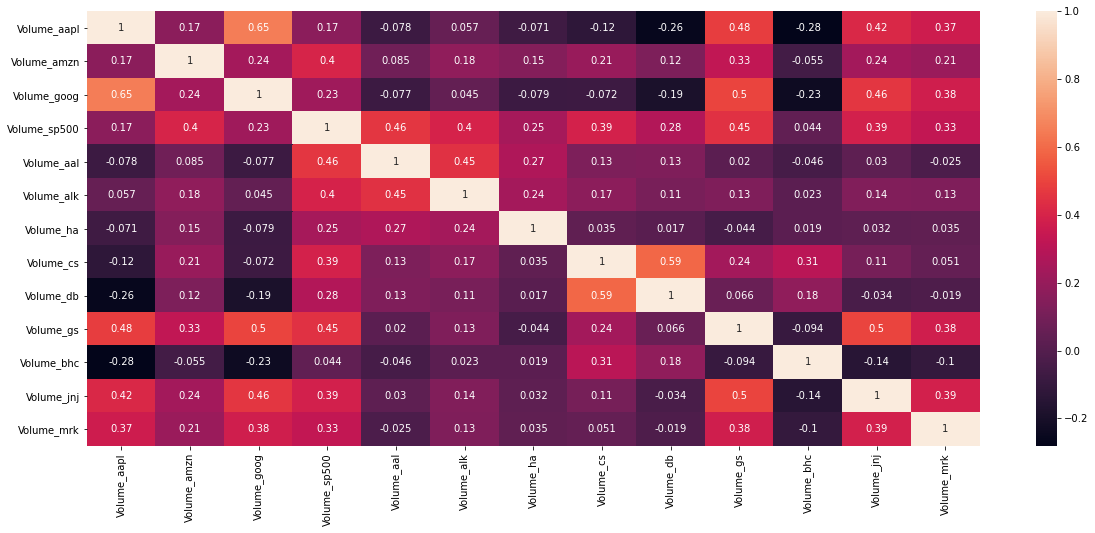

In [38]:
#Plotting the correlation of Numerical variable in the data set
plt.figure(figsize = (20,8))        # Size of the figure
sns.heatmap(portfolio_vol.corr(),annot = True)
plt.show()

There is no correlation between the volume of the Stock

In [39]:
#Determining the correlation of Numerical variable in the data set
portfolio_price.corr()

Close_aal  Close_alk  Close_ha  Close_cs  Close_db  Close_gs  Close_bhc  Close_jnj  Close_mrk  Close_aapl  Close_amzn  Close_goog  Close_sp500
Close_aal     1.000000   0.890026  0.788744 -0.340154 -0.464789  0.727642   0.210146   0.584161   0.427296    0.154700    0.163009    0.392866     0.496864
Close_alk     0.890026   1.000000  0.916102 -0.563531 -0.670872  0.754135   0.010173   0.712779   0.602897    0.337521    0.359701    0.573381     0.644577
Close_ha      0.788744   0.916102  1.000000 -0.619258 -0.699744  0.703525  -0.283924   0.681827   0.504330    0.301413    0.376997    0.562785     0.592918
Close_cs     -0.340154  -0.563531 -0.619258  1.000000  0.945704 -0.406314   0.467753  -0.780398  -0.745912   -0.684862   -0.728191   -0.774727    -0.753339
Close_db     -0.464789  -0.670872 -0.699744  0.945704  1.000000 -0.592367   0.419576  -0.888055  -0.843764   -0.754695   -0.816208   -0.882799    -0.874901
Close_gs      0.727642   0.754135  0.703525 -0.406314 -0.592367  1.000000  -0.141435   0.797572   0.660765    0.571560    0.601278    0.742851     0.798799
Close_bhc     0.210146   0.010173 -0.283924  0.467753  0.419576 -0.141435   1.000000  -0.310854  -0.207844   -0.323810   -0.466632   -0.409712    -0.295212
Close_jnj     0.584161   0.712779  0.681827 -0.780398 -0.888055  0.797572  -0.310854   1.000000   0.911889    0.804376    0.846367    0.945177     0.965593
Close_mrk     0.427296   0.602897  0.504330 -0.745912 -0.843764  0.660765  -0.207844   0.911889   1.000000    0.830618    0.841816    0.906549     0.938794
Close_aapl    0.154700   0.337521  0.301413 -0.684862 -0.754695  0.571560  -0.323810   0.804376   0.830618    1.000000    0.948388    0.909349     0.888659
Close_amzn    0.163009   0.359701  0.376997 -0.728191 -0.816208  0.601278  -0.466632   0.846367   0.841816    0.948388    1.000000    0.953497     0.915199
Close_goog    0.392866   0.573381  0.562785 -0.774727 -0.882799  0.742851  -0.409712   0.945177   0.906549    0.909349    0.953497    1.000000     0.980914
Close_sp500   0.496864   0.644577  0.592918 -0.753339 -0.874901  0.798799  -0.295212   0.965593   0.938794    0.888659    0.915199    0.980914     1.000000

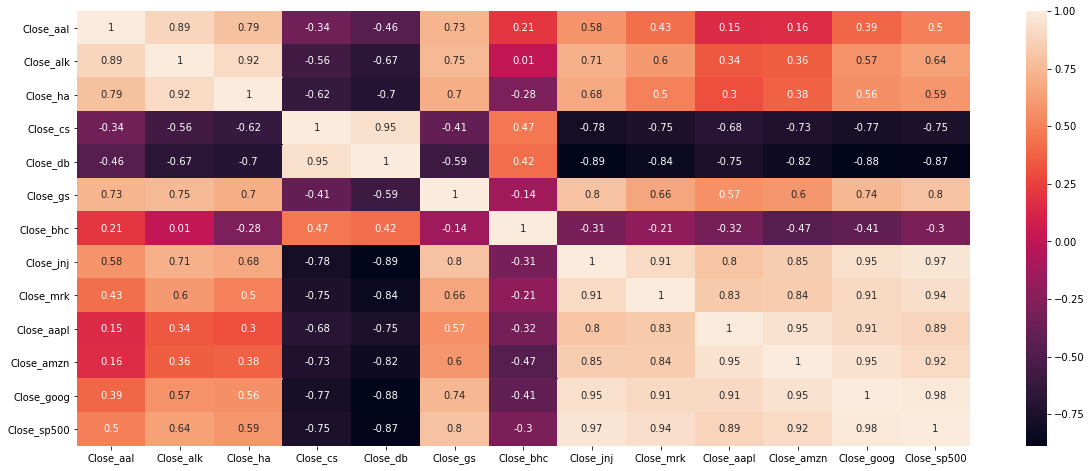

In [40]:
#plotting the correlation of Numerical variable in the data set
plt.figure(figsize = (20,8))        # Size of the figure
sns.heatmap(portfolio_price.corr(),annot = True)
plt.show()

The prices have a correlation for Ex: 
    - sp500 has positive correlation with mrk,aapl,amzn,goog
    - goog has positive correlation with mrk,aapl,amzn & negatively correlation with cs,db
    - amzn has negative ccorrelation with cs,db & positive correlation with aapl,mrk

In [41]:
# Dropping the rows with missing values
portfolio_price = portfolio_price.dropna(axis=0)
portfolio_price.head()

Close_aal  Close_alk  Close_ha   Close_cs   Close_db    Close_gs  Close_bhc  Close_jnj  Close_mrk  Close_aapl  Close_amzn  Close_goog  Close_sp500
Date                                                                                                                                                          
2010-01-10       9.29    12.4475      5.96  42.226563  52.595421  147.699997  25.750000  61.750000  36.599998   10.090000  153.710007  261.828613  1146.239990
2010-04-10       9.12    12.1425      5.75  41.914063  51.755726  146.570007  25.870001  61.669998  36.520000    9.951428  155.389999  260.199707  1137.030029
2010-05-10       9.23    12.2150      5.85  43.154297  53.950382  149.570007  26.299999  62.799999  37.020000   10.319285  160.869995  268.110046  1160.750000
2010-06-10       9.23    12.1875      5.97  43.437500  54.608780  150.839996  26.690001  63.209999  37.009998   10.328215  155.399994  266.177307  1159.969971
2010-07-10       9.24    11.6250      6.15  43.671875  54.036259  151.110001  26.600000  63.220001  36.709999   10.329286  156.270004  264.015411  1158.060059

In [42]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
portfolio_price.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Close_aal    Close_alk     Close_ha     Close_cs     Close_db     Close_gs    Close_bhc    Close_jnj    Close_mrk   Close_aapl   Close_amzn   Close_goog  Close_sp500
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000
mean     29.397636    50.031176    22.870413    21.501379    27.304930   179.598184    61.880687   105.277378    57.161053    33.454670   854.636107   730.426139  2111.392732
std      15.211889    24.187020    15.483034     8.988043    15.409974    42.405475    57.170002    28.174233    15.164505    20.630118   745.201139   364.685720   612.227235
min       4.000000    11.620000     3.780000     6.670000     5.480000    87.699997     8.510000    57.660000    29.809999     9.951428   153.029999   236.553345  1099.229980
25%      13.010000    26.780001     7.030000    13.740000    13.470000   154.990005    22.170000    81.930000    45.730000    18.961428   266.489990   403.642059  1562.170044
50%      32.520000    58.540001    21.910000    19.639999    28.370001   177.229996    38.759998   104.040001    57.180000    27.592501   533.750000   651.789978  2071.219971
75%      42.200001    67.260002    36.900002    27.750000    41.049618   211.580002    90.269997   130.979996    64.089996    42.962502  1500.000000  1055.810059  2656.300049
90%      48.524000    79.971999    45.738000    31.690001    47.341604   237.092002   139.426004   140.765997    81.370003    56.760500  1883.970020  1229.462036  2932.953955
95%      51.203999    87.246002    49.170002    40.615234    54.685116   245.797995   202.710001   146.256006    84.341996    77.379002  2137.870117  1393.513965  3128.569971
99%      54.310400    95.120003    56.234000    44.056250    59.192368   262.873992   239.427202   150.507204    89.087198   112.979602  3162.044795  1521.840821  3373.169199
max      58.470001   100.239998    60.299999    46.513672    62.624046   273.380005   262.519989   155.509995    92.040001   134.179993  3531.449951  1728.280029  3580.840088

### Outier Treatment of Columns

In [43]:
# plt.figure(figsize = (15,15))
# plt.tight_layout()
# feature = portfolio_price.columns
# for i in enumerate(feature):
#     plt.subplot(4,4, i[0]+1)
#     sns.boxplot(portfolio_price[i[1]])

In [44]:
#Exporting the datasets to csv file
portfolio_price.to_csv('portfolio_price.csv')
portfolio_vol.to_csv('portfolio_vol.csv')

In [45]:
#capping of outliers
Q1 = portfolio_price.quantile(0.25)
Q3 = portfolio_price.quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is\n',low_lim)
print('up_limit is\n',up_lim)


# for col in data.columns:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
    
#     col_median = data[col].median()
    
#     # IQR
#     data[col] = np.where(data[col] < (Q1 - 1.5 * IQR), col_median, data[col])
#     data[col] = np.where(data[col] > (Q3 + 1.5 * IQR), col_median, data[col])

low_limit is
 Close_aal       -30.775002
Close_alk       -33.940000
Close_ha        -37.775003
Close_cs         -7.275000
Close_db        -27.899427
Close_gs         70.105009
Close_bhc       -79.979996
Close_jnj         8.355006
Close_mrk        18.190006
Close_aapl      -17.040183
Close_amzn    -1583.775025
Close_goog     -574.609941
Close_sp500     -79.024964
dtype: float64
up_limit is
 Close_aal        85.985003
Close_alk       127.980004
Close_ha         81.705005
Close_cs         48.765000
Close_db         82.419045
Close_gs        296.464998
Close_bhc       192.419993
Close_jnj       204.554990
Close_mrk        91.629990
Close_aapl       78.964113
Close_amzn     3350.265015
Close_goog     2034.062059
Close_sp500    4297.495056
dtype: float64


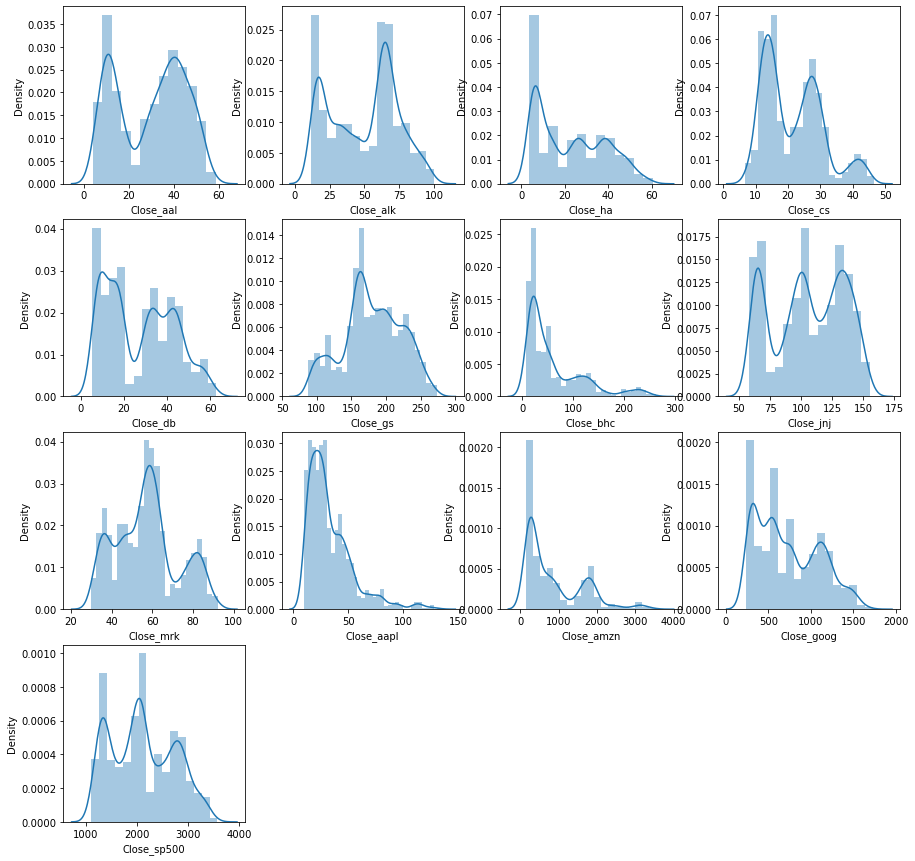

In [46]:
#Plotting the histogram/frequency plots of the columns in the dataset
plt.figure(figsize = (15,15))
plt.tight_layout()
feature = portfolio_price.columns
for i in enumerate(feature):
    plt.subplot(4,4, i[0]+1)
    sns.distplot(portfolio_price[i[1]],hist=True)
plt.show()

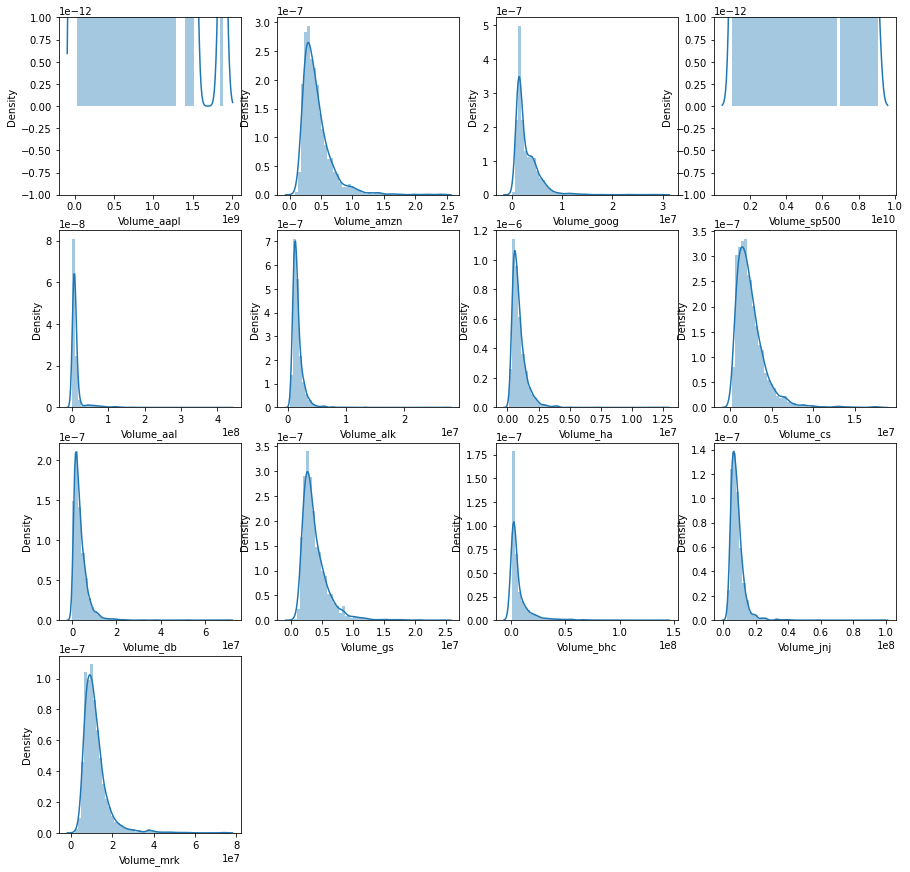

In [47]:
#Plotting the histogram/frequency plots of the columns in the dataset
plt.figure(figsize = (15,15))
plt.tight_layout()
feature = portfolio_vol.columns
for i in enumerate(feature):
    plt.subplot(4,4, i[0]+1)
    sns.distplot(portfolio_vol[i[1]],hist=True)
#plt.ylabel('log')
plt.show()

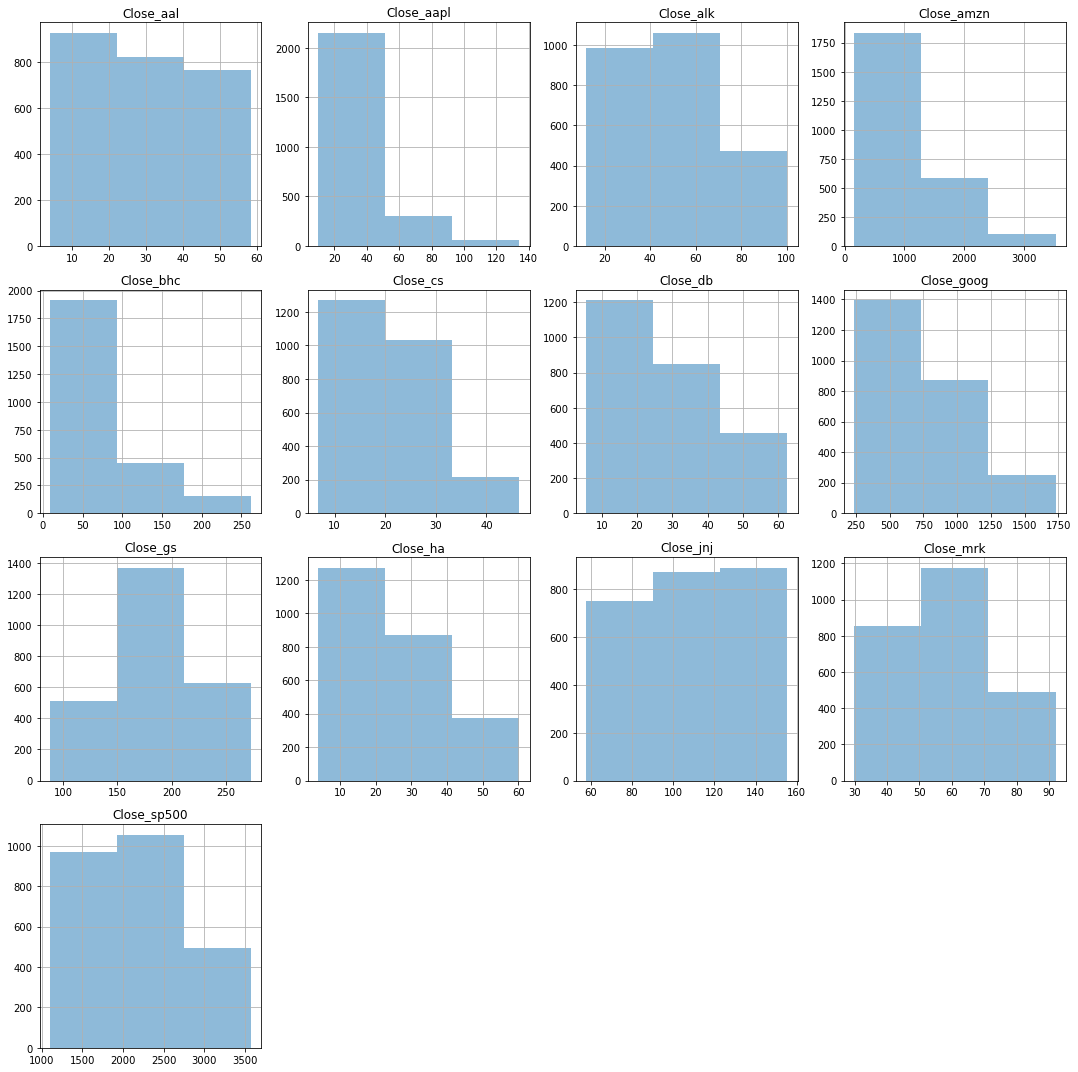

In [48]:
portfolio_price.hist(layout=(4,4), figsize=(15,15),alpha=0.5, bins=3)
plt.tight_layout()
plt.show()

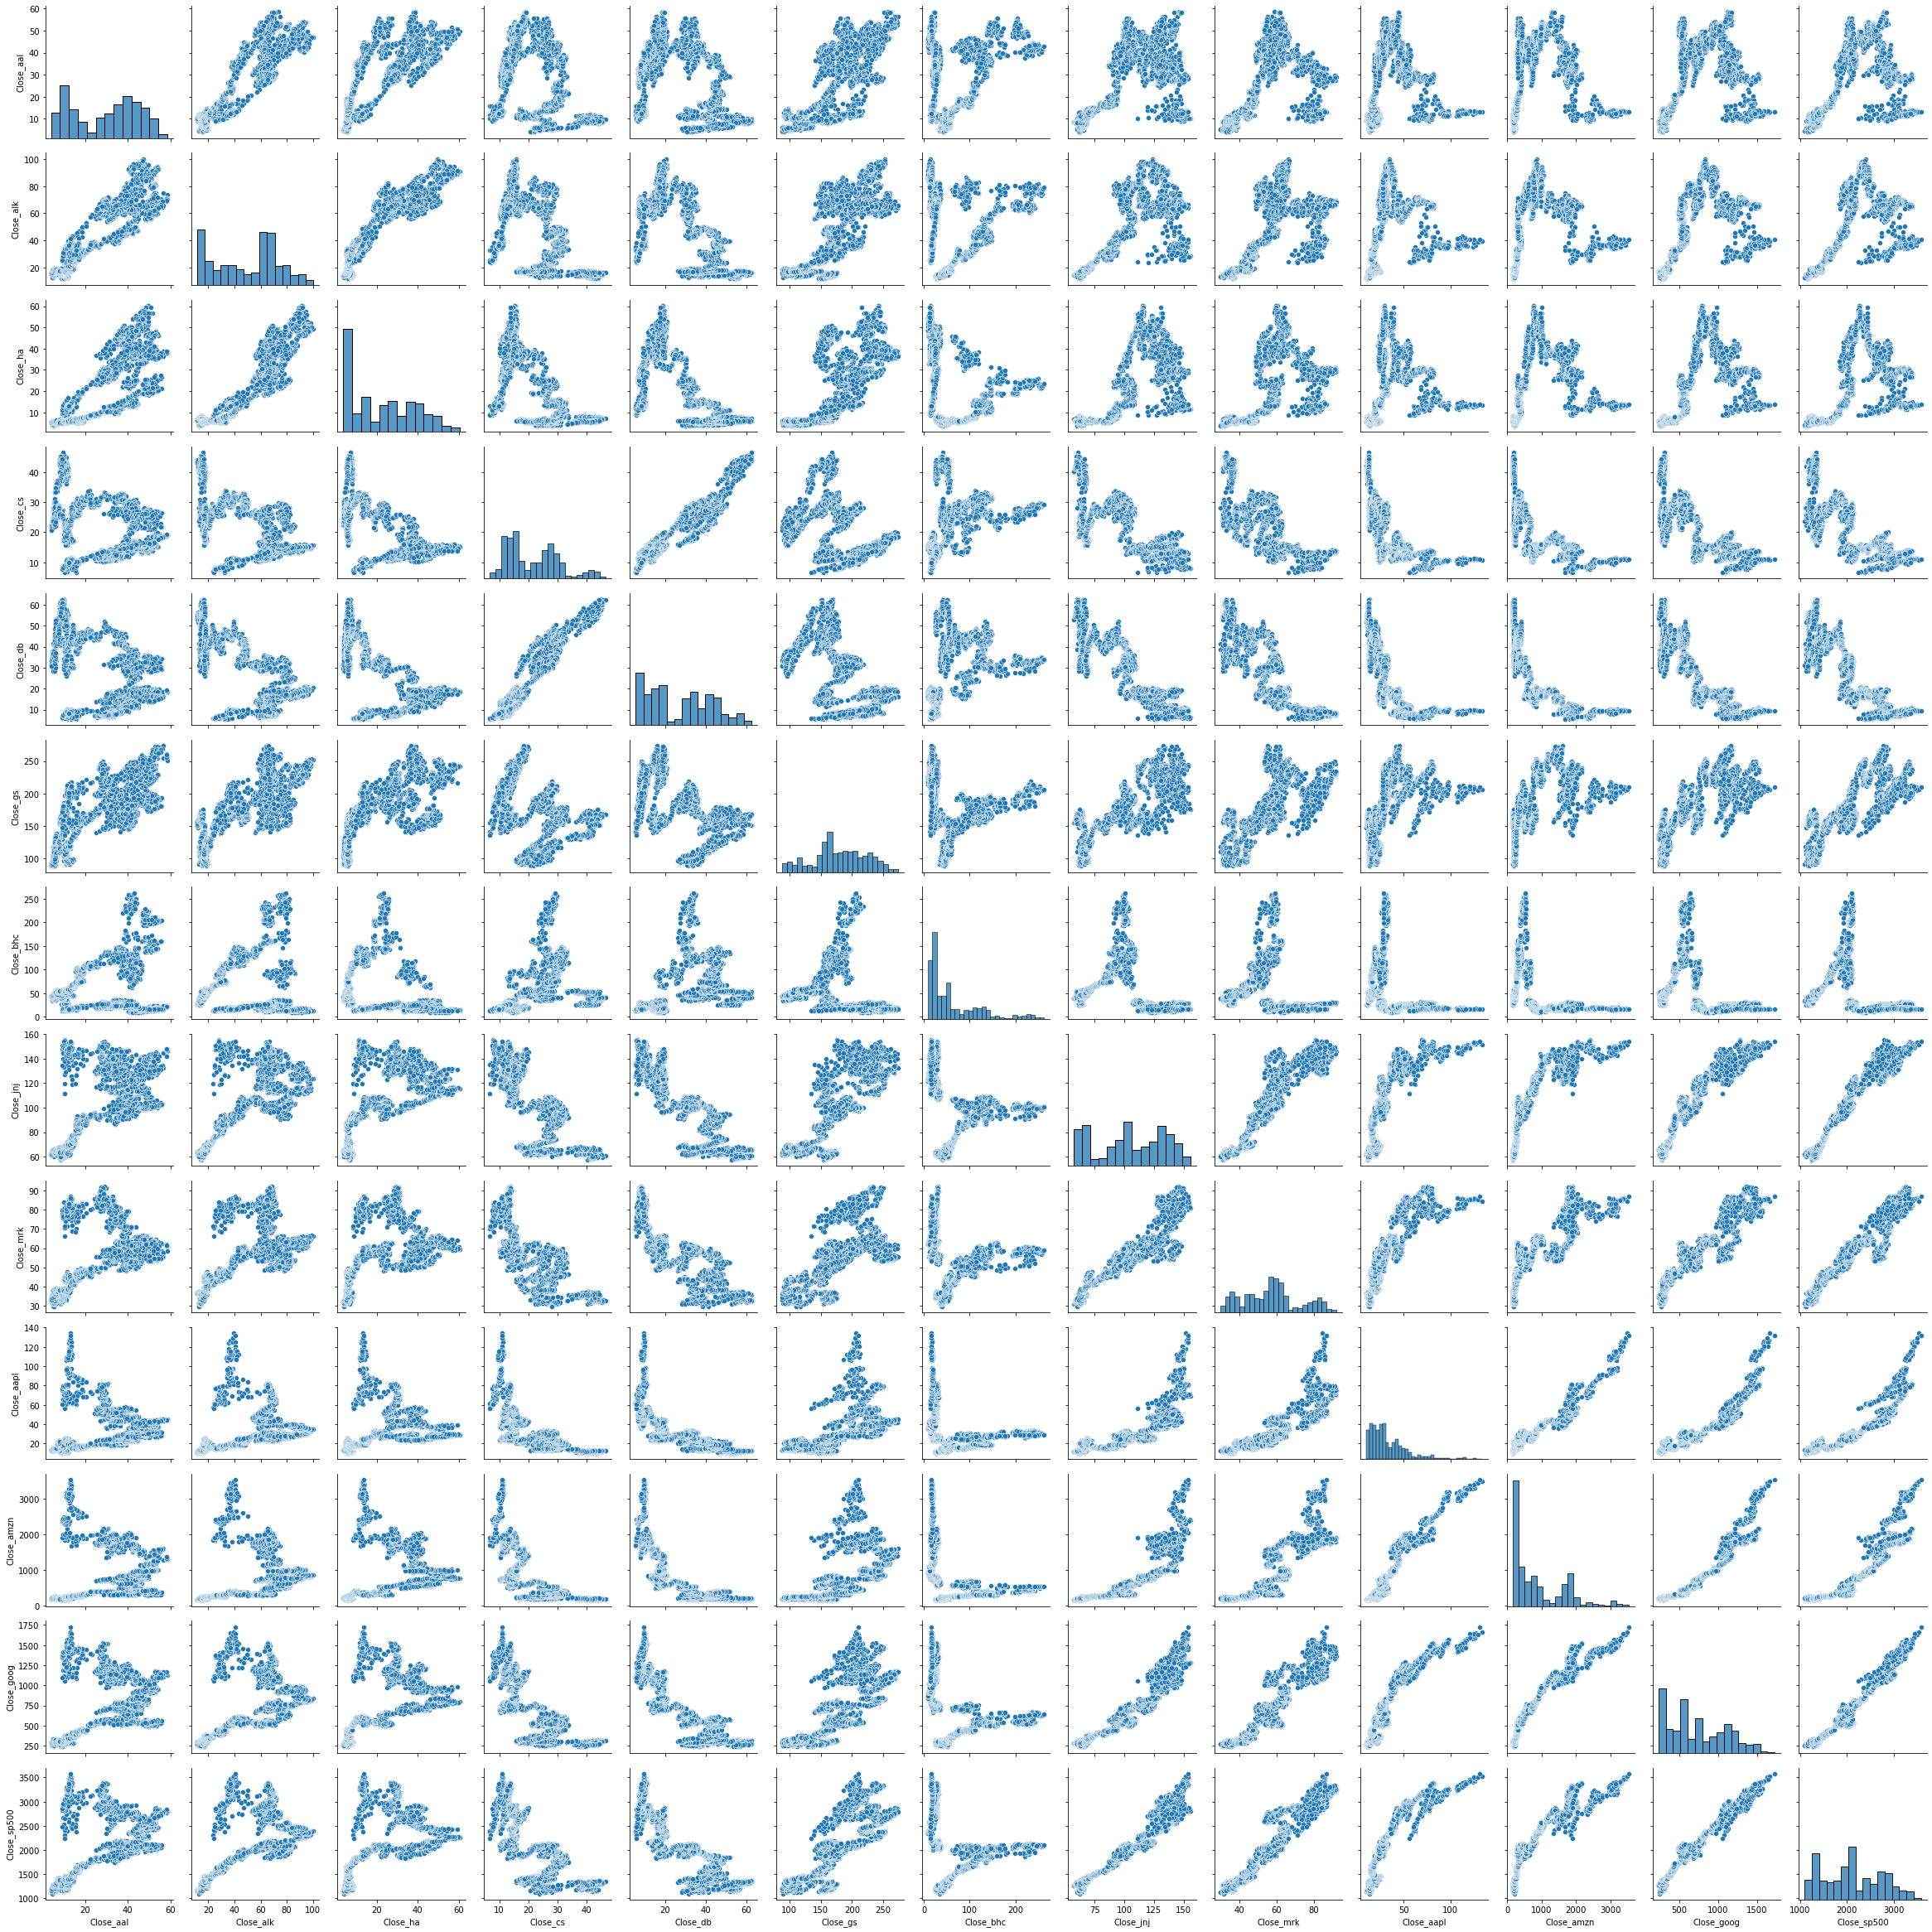

In [49]:
sns.pairplot(portfolio_price)
plt.tight_layout()
plt.show()

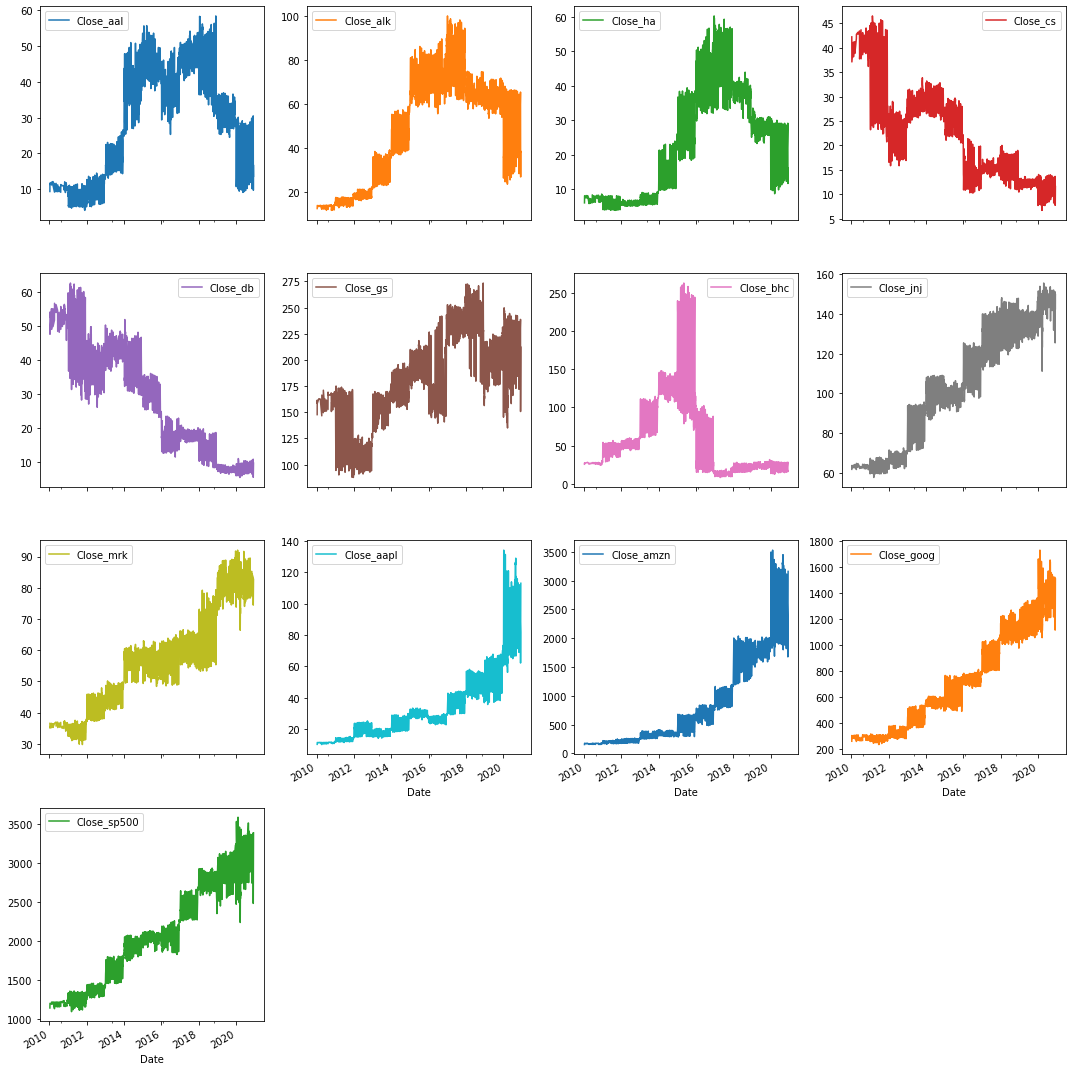

In [50]:
portfolio_price.plot(kind = 'line',subplots=True, layout = (4,4),figsize=(15,15))
plt.tight_layout()
plt.show()

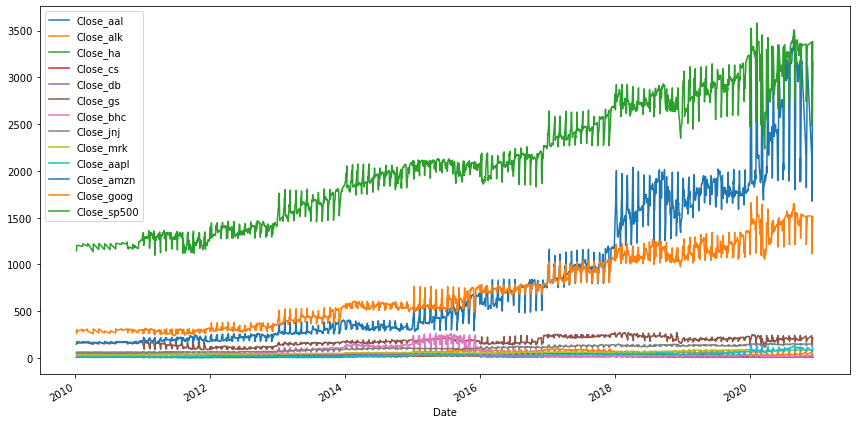

In [51]:
#portfolio2.plot(kind = 'line',subplots=True, layout = (4,4),figsize=(15,15))
portfolio_price.plot(figsize=(12,6));
plt.legend(loc='best')
plt.tight_layout()
plt.show()

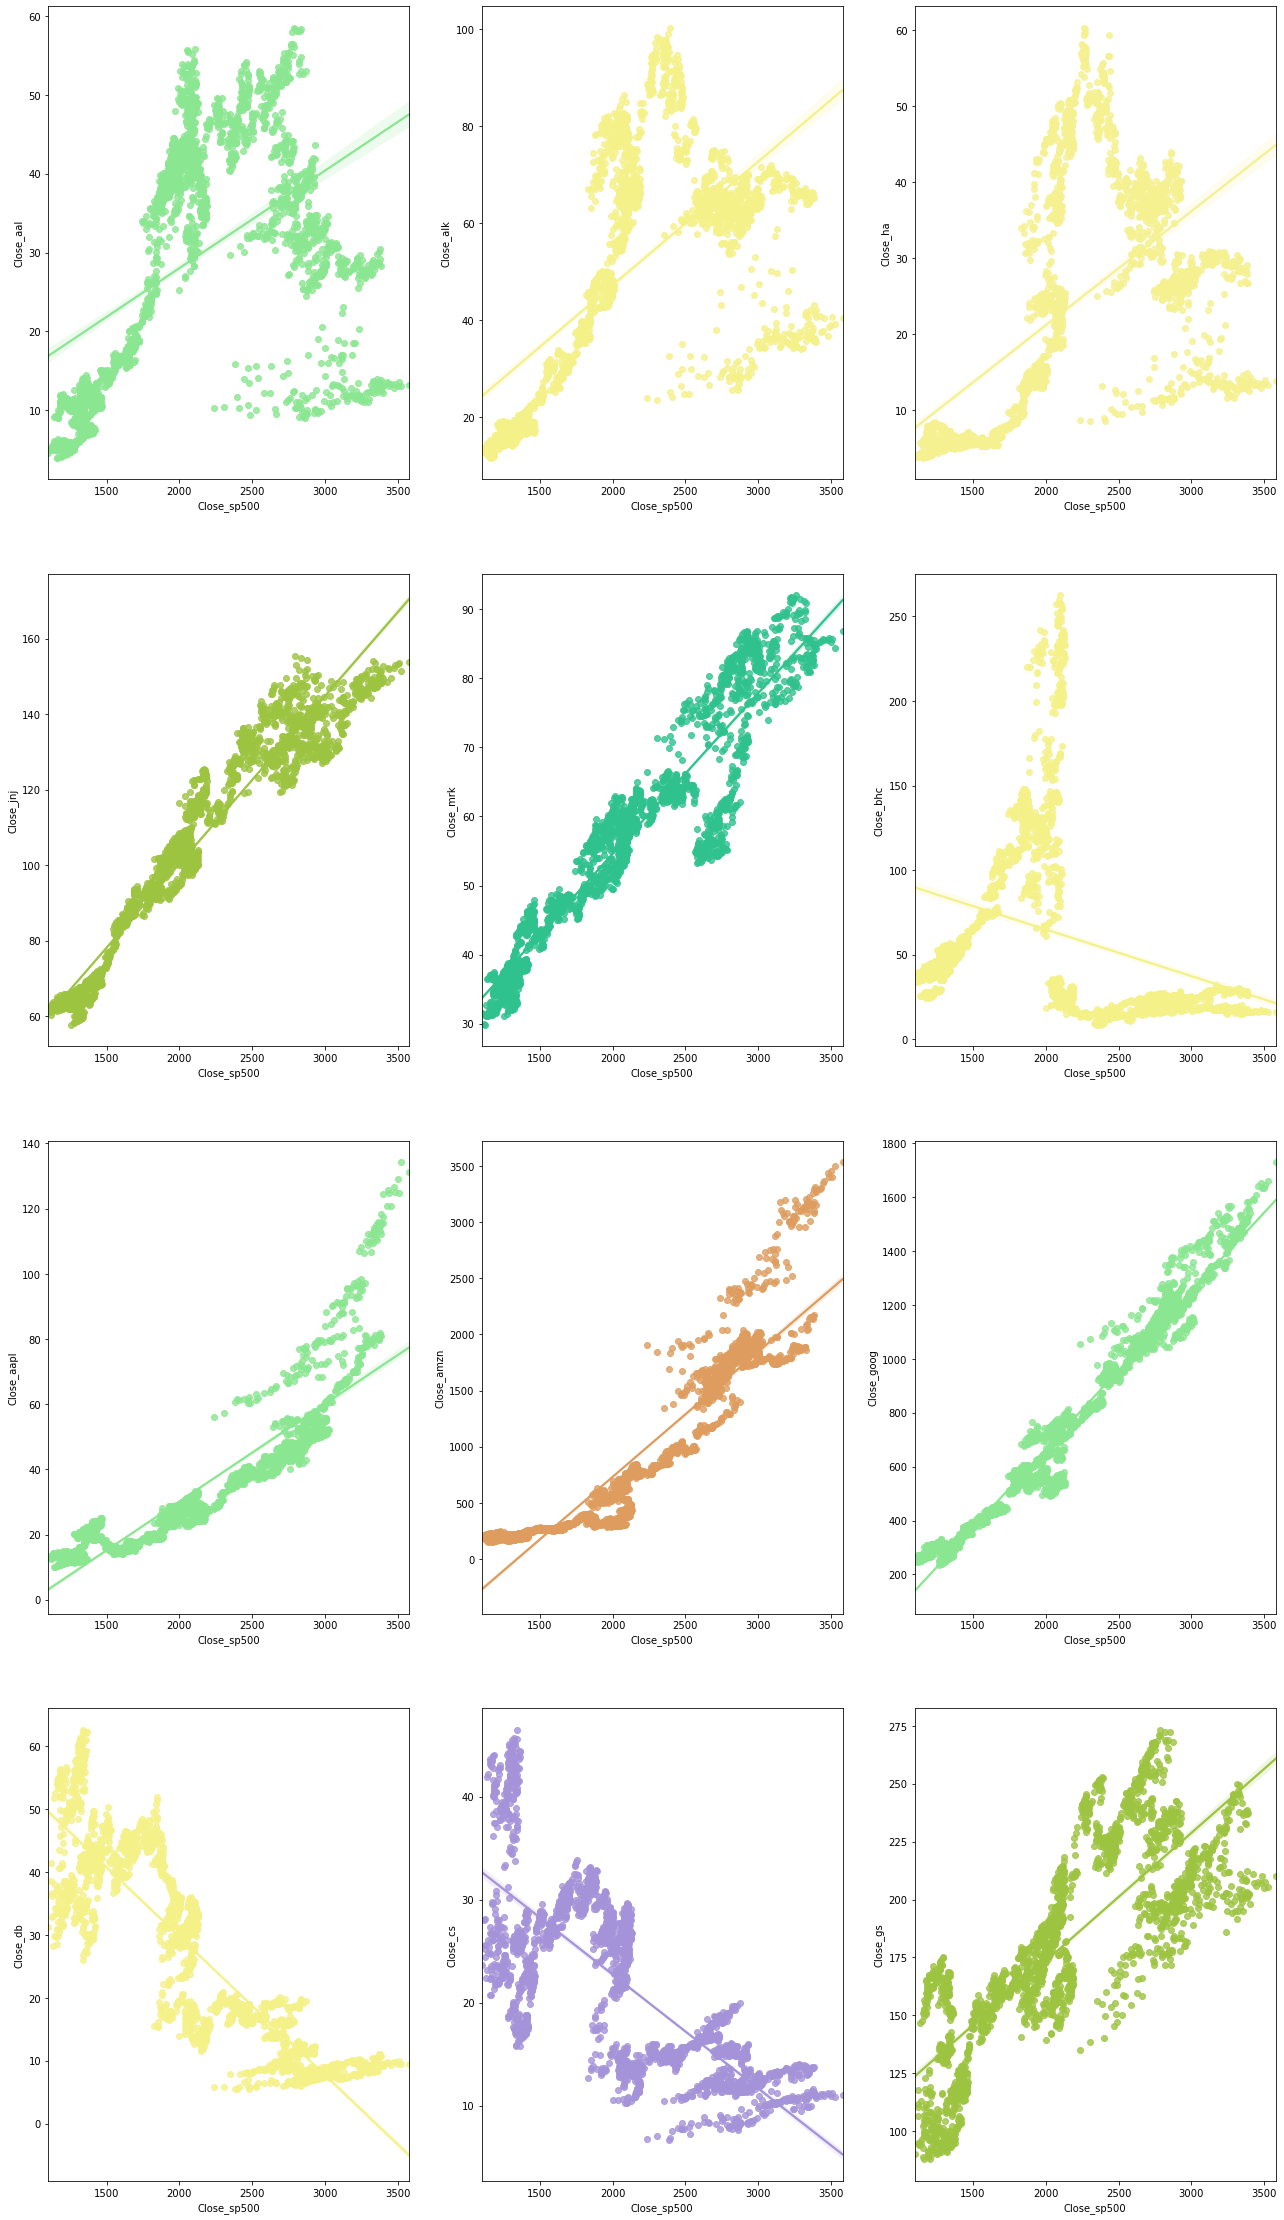

In [52]:
plt.figure(figsize = [22,40])
plt.subplot(4,3,1)
sns.regplot(data = portfolio_price, x = "Close_sp500",y = "Close_aal",color="#8ae691")
plt.subplot(4,3,2)
sns.regplot(data = portfolio_price, x = "Close_sp500",y = "Close_alk",color="#f5f189")
plt.subplot(4,3,3)
sns.regplot(data = portfolio_price, x = "Close_sp500",y = "Close_ha",color="#f5f190")
plt.subplot(4,3,4)
sns.regplot(data = portfolio_price, x = "Close_sp500",y = "Close_jnj",color="#9dc441")
plt.subplot(4,3,5)
sns.regplot(data = portfolio_price, x = "Close_sp500",y = "Close_mrk",color="#2fc28e")
plt.subplot(4,3,6)
sns.regplot(data = portfolio_price, x = "Close_sp500",y = "Close_bhc",color="#f5f189")
plt.subplot(4,3,7)
sns.regplot(data = portfolio_price, x = "Close_sp500",y = "Close_aapl",color="#8ae691")
plt.subplot(4,3,8)
sns.regplot(data = portfolio_price, x = "Close_sp500",y = "Close_amzn",color="#de9d5f")
plt.subplot(4,3,9)
sns.regplot(data = portfolio_price, x = "Close_sp500",y = "Close_goog",color="#8ae691")
plt.subplot(4,3,10)
sns.regplot(data = portfolio_price, x = "Close_sp500",y = "Close_db",color="#f5f189")
plt.subplot(4,3,11)
sns.regplot(data = portfolio_price, x = "Close_sp500",y = "Close_cs",color="#a593d9")
plt.subplot(4,3,12)
sns.regplot(data = portfolio_price, x = "Close_sp500",y = "Close_gs",color="#9dc441")
plt.show()

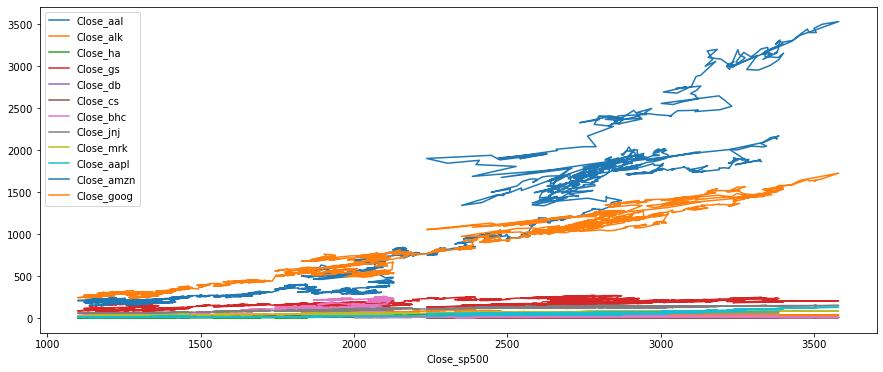

In [53]:
fig, ax = plt.subplots(figsize=(15,6))
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_aal',ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_alk', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_ha', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_gs',ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_db', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_cs', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_bhc',ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_jnj', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_mrk', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_aapl',ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_amzn', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_goog', ax=ax)
plt.show()

In [54]:
portfolio_price_original=portfolio_price.copy()

In [55]:
portfolio_price_original.to_csv('portfolio_price_original.csv')

## Normalizing each stock

In [56]:
# Normalizing the Data 
for column in portfolio_price.columns:
     portfolio_price[column] = portfolio_price[column]  / portfolio_price[column][0]

In [57]:
portfolio_price.head()

Close_aal  Close_alk  Close_ha  Close_cs  Close_db  Close_gs  Close_bhc  Close_jnj  Close_mrk  Close_aapl  Close_amzn  Close_goog  Close_sp500
Date                                                                                                                                                      
2010-01-10   1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   1.000000   1.000000   1.000000    1.000000    1.000000    1.000000     1.000000
2010-04-10   0.981701   0.975497  0.964765  0.992599  0.984035  0.992349   1.004660   0.998704   0.997814    0.986266    1.010930    0.993779     0.991965
2010-05-10   0.993541   0.981322  0.981544  1.021970  1.025762  1.012661   1.021359   1.017004   1.011475    1.022724    1.046581    1.023991     1.012659
2010-06-10   0.993541   0.979112  1.001678  1.028677  1.038280  1.021259   1.036505   1.023644   1.011202    1.023609    1.010995    1.016609     1.011978
2010-07-10   0.994618   0.933922  1.031879  1.034228  1.027395  1.023087   1.033010   1.023806   1.003005    1.023715    1.016655    1.008352     1.010312

In [58]:
#portfolio_price.to_csv("portfolio_price_normalized.csv")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


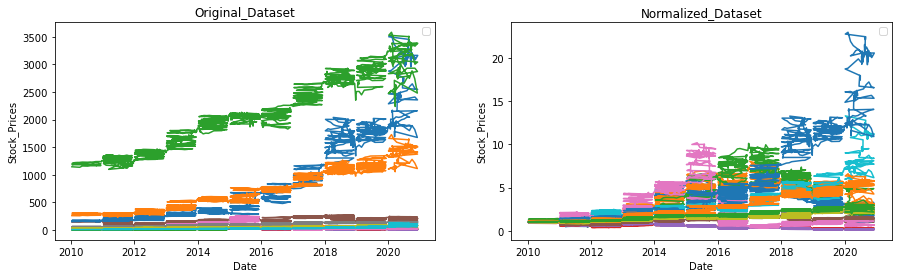

In [59]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15, 4))

ax1.plot(portfolio_price_original)
ax1.set_title('Original_Dataset')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock_Prices')
ax1.legend(loc='best')
ax2.plot(portfolio_price)
ax2.set_title('Normalized_Dataset')
ax2.set_xlabel('Date')
ax2.set_ylabel('Stock_Prices')
ax2.legend(loc='best')
plt.show()

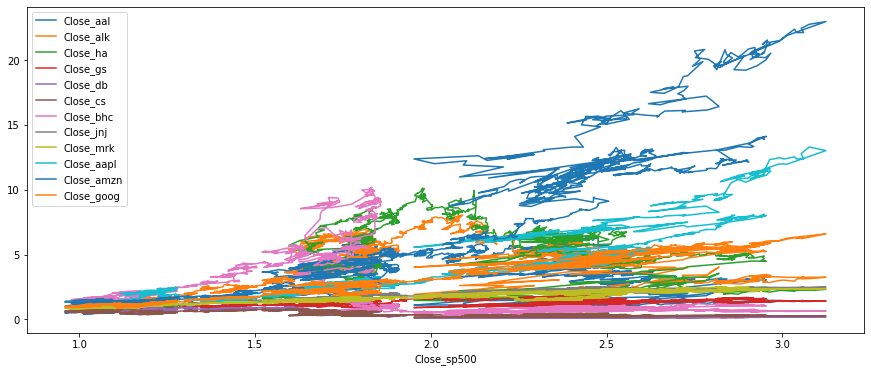

In [60]:
#ax,fig = plt.gca(),plt.figure(figsize=(15, 15))
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
fig, ax = plt.subplots(figsize=(15,6))
# df['some_column'].plot(ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_aal',ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_alk', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_ha', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_gs',ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_db', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_cs', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_bhc',ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_jnj', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_mrk', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_aapl',ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_amzn', ax=ax)
portfolio_price.plot(kind='line',x='Close_sp500',y='Close_goog', ax=ax)
plt.show()

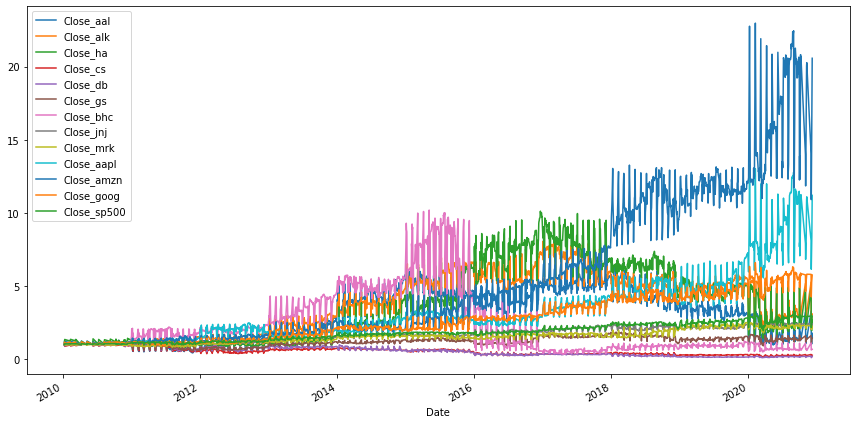

In [61]:
portfolio_price.plot(kind='line',figsize=(12,6));
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Daily return from each stock

Daily return is the percentage change in the price of the stock from the previous day. This can be calculated using the percentage change in the price on a daily basis.

In [62]:
# compute daily returns using pandas pct_change()
portfolio_price_daily_returns = portfolio_price.pct_change()
# skip first row with NA 
portfolio_price_daily_returns_percentage = portfolio_price_daily_returns[1:]*100
portfolio_price_daily_returns_percentage.head()

Close_aal  Close_alk  Close_ha  Close_cs  Close_db  Close_gs  Close_bhc  Close_jnj  Close_mrk  Close_aapl  Close_amzn  Close_goog  Close_sp500
Date                                                                                                                                                      
2010-04-10  -1.829925  -2.450291 -3.523490 -0.740055 -1.596517 -0.765058   0.466023  -0.129558  -0.218574   -1.373360    1.092962   -0.622127    -0.803493
2010-05-10   1.206140   0.597076  1.739130  2.958993  4.240412  2.046803   1.662149   1.832335   1.369113    3.696525    3.526608    3.040103     2.086134
2010-06-10   0.000000  -0.225133  2.051282  0.656257  1.220377  0.849093   1.482897   0.652866  -0.027018    0.086537   -3.400262   -0.720875    -0.067200
2010-07-10   0.108342  -4.615385  3.015075  0.539568 -1.048405  0.179001  -0.337209   0.015823  -0.810589    0.010370    0.559852   -0.812201    -0.164652
2010-08-10  -1.839827   3.634409  0.000000 -1.565296 -0.300193  1.025745   0.902256   0.015816   0.544813    1.676921   -0.460742    1.196196     0.612228

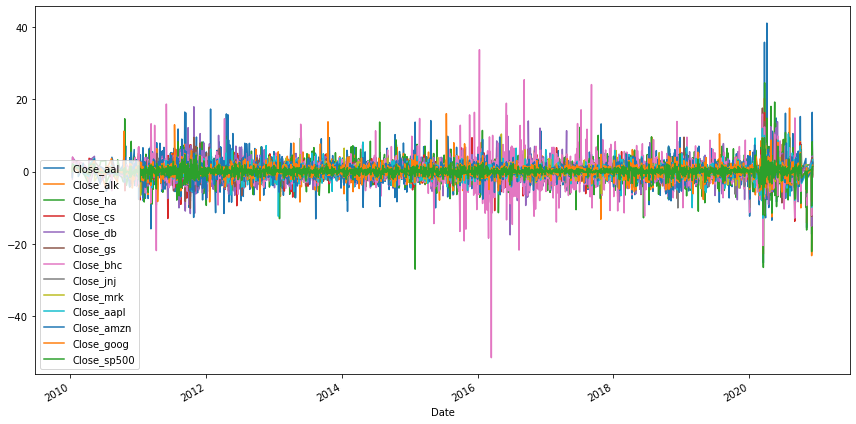

In [63]:
portfolio_price_daily_returns_percentage.plot(figsize=(12,6));
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [64]:
# Calculate the cumulative daily returns
portfolio_price_cum_daily_returns = (1 + portfolio_price_daily_returns[1:]).cumprod() - 1
#portfolio_price_cum_daily_returns = portfolio_price_cum_daily_returns.reset_index()
portfolio_price_cum_daily_returns.head().apply(lambda s: s.apply('{0:.2f}'.format))

Close_aal Close_alk Close_ha Close_cs Close_db Close_gs Close_bhc Close_jnj Close_mrk Close_aapl Close_amzn Close_goog Close_sp500
Date                                                                                                                                         
2010-04-10     -0.02     -0.02    -0.04    -0.01    -0.02    -0.01      0.00     -0.00     -0.00      -0.01       0.01      -0.01       -0.01
2010-05-10     -0.01     -0.02    -0.02     0.02     0.03     0.01      0.02      0.02      0.01       0.02       0.05       0.02        0.01
2010-06-10     -0.01     -0.02     0.00     0.03     0.04     0.02      0.04      0.02      0.01       0.02       0.01       0.02        0.01
2010-07-10     -0.01     -0.07     0.03     0.03     0.03     0.02      0.03      0.02      0.00       0.02       0.02       0.01        0.01
2010-08-10     -0.02     -0.03     0.03     0.02     0.02     0.03      0.04      0.02      0.01       0.04       0.01       0.02        0.02

In [65]:
portfolio_price_cum_daily_returns.tail()

Close_aal  Close_alk  Close_ha  Close_cs  Close_db  Close_gs  Close_bhc  Close_jnj  Close_mrk  Close_aapl  Close_amzn  Close_goog  Close_sp500
Date                                                                                                                                                      
2020-09-24   0.266954   1.868046  1.080537 -0.772181 -0.845804  0.320989  -0.408932   1.342834   1.271858    9.725471   18.646021    4.455057     1.832382
2020-09-25   0.322928   1.948383  1.147651 -0.775497 -0.847896  0.319905  -0.405825   1.358866   1.265847   10.127849   19.136164    4.518724     1.877635
2020-09-28   0.373520   2.015867  1.244966 -0.765550 -0.839720  0.347800  -0.406990   1.382348   1.261202   10.393459   19.649599    4.593430     1.923995
2020-09-29   0.318622   1.945973  1.157718 -0.767208 -0.842762  0.332363  -0.422136   1.381538   1.237705   10.307234   19.459825    4.611801     1.909923
2020-09-30   0.322928   1.942760  1.162752 -0.763893 -0.840290  0.360664  -0.396505   1.411012   1.266393   10.477700   19.484873    4.612832     1.933941

In [66]:
cum_return_entire_period = portfolio_price_cum_daily_returns.tail(1)
cum_return_entire_period * 100

Close_aal   Close_alk    Close_ha   Close_cs   Close_db   Close_gs  Close_bhc   Close_jnj   Close_mrk  Close_aapl   Close_amzn  Close_goog  Close_sp500
Date                                                                                                                                                               
2020-09-30  32.292788  194.275967  116.275168 -76.389269 -84.029028  36.066354 -39.650485  141.101223  126.639348  1047.77005  1948.487305  461.283184   193.394056

In [67]:
cummulative_return=round((cum_return_entire_period*100),2).stack().sort_values(ascending=False).reset_index().set_axis(['Date','stock','cumm_return'], axis=1)

In [68]:
cummulative_return.drop(columns='Date',axis=1,inplace=True)
cummulative_return

stock  cumm_return
0    Close_amzn      1948.49
1    Close_aapl      1047.77
2    Close_goog       461.28
3     Close_alk       194.28
4   Close_sp500       193.39
5     Close_jnj       141.10
6     Close_mrk       126.64
7      Close_ha       116.28
8      Close_gs        36.07
9     Close_aal        32.29
10    Close_bhc       -39.65
11     Close_cs       -76.39
12     Close_db       -84.03

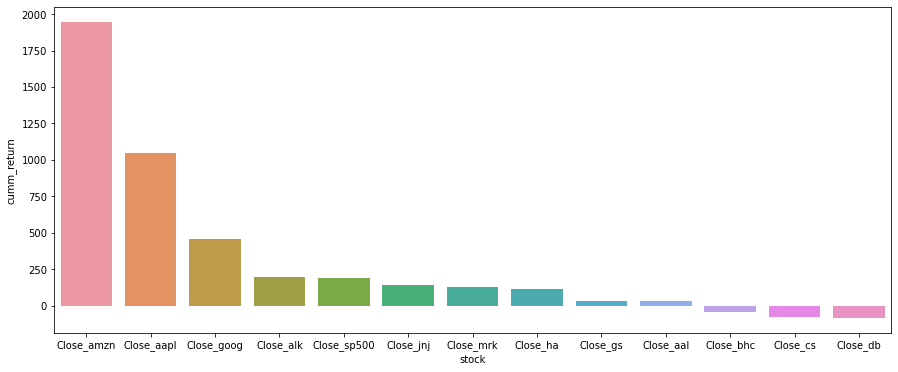

In [69]:
plt.figure(figsize = [15,6])
sns.barplot(x='stock', y='cumm_return', data=cummulative_return)
plt.show()

In [70]:
returns = portfolio_price_daily_returns_percentage.aggregate(['sum','max', 'min','mean','std','count'])
returns

Close_aal    Close_alk     Close_ha     Close_cs     Close_db     Close_gs    Close_bhc    Close_jnj    Close_mrk   Close_aapl   Close_amzn   Close_goog  Close_sp500
sum     160.234149   178.507808   192.518341   -81.758466   -95.949893    73.096126   116.787536   102.845286   103.221171   283.712802   351.642153   205.696336   122.770760
max      41.097038    20.307943    24.583741    16.344725    17.950641    17.580307    33.744400     7.997719    10.408024    11.980826    15.745701    16.052431     9.382774
min     -25.224647   -23.238509   -26.972200   -18.259804   -17.488789   -12.705308   -51.462924   -10.037876    -8.899025   -12.864695   -12.656835   -11.100820   -11.984055
mean      0.063686     0.070949     0.076518    -0.032495    -0.038136     0.029053     0.046418     0.040877     0.041026     0.112763     0.139762     0.081755     0.048796
std       3.272570     2.356248     3.014728     2.220596     2.637411     1.833103     3.569964     1.084679     1.304875     1.771853     1.988944     1.628781     1.093416
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000

### Annual Returns

In [71]:
annual_returns=returns.iloc[3]*252

### Annualized Returns

In [72]:
annualized_returns=annual_returns.sort_values(ascending=False).reset_index().set_axis(['stock','annual_return'], axis=1)
annualized_returns

stock  annual_return
0    Close_amzn      35.220120
1    Close_aapl      28.416386
2    Close_goog      20.602336
3      Close_ha      19.282441
4     Close_alk      17.879160
5     Close_aal      16.048889
6   Close_sp500      12.296594
7     Close_bhc      11.697321
8     Close_mrk      10.338527
9     Close_jnj      10.300879
10     Close_gs       7.321234
11     Close_cs      -8.188845
12     Close_db      -9.610244

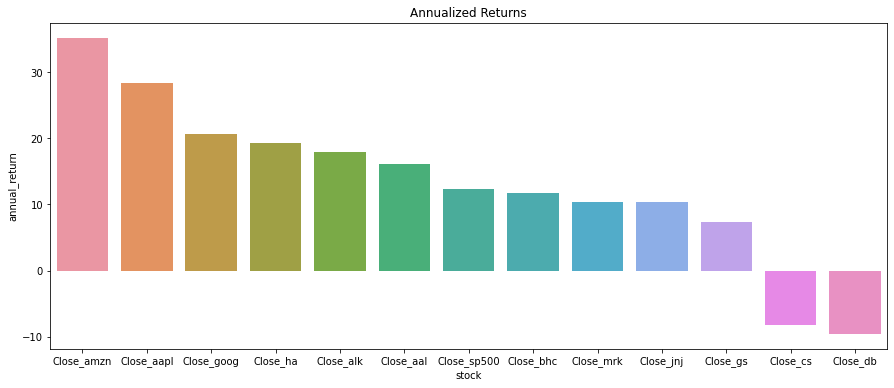

In [73]:
plt.figure(figsize = [15,6])
sns.barplot(x='stock', y='annual_return', data=annualized_returns)
plt.title('Annualized Returns')
plt.show()

### Annual Risk

In [74]:
annual_risk=returns.iloc[4]*math.sqrt(252)

### Annualized Risk

In [75]:
annualized_risk= annual_risk.sort_values(ascending=True).reset_index().set_axis(['stock','annual_risk'], axis=1)
annualized_risk.head(15)

stock  annual_risk
0     Close_jnj    17.218738
1   Close_sp500    17.357439
2     Close_mrk    20.714241
3    Close_goog    25.856093
4    Close_aapl    28.127302
5      Close_gs    29.099614
6    Close_amzn    31.573504
7      Close_cs    35.250863
8     Close_alk    37.404274
9      Close_db    41.867595
10     Close_ha    47.857323
11    Close_aal    51.950444
12    Close_bhc    56.671428

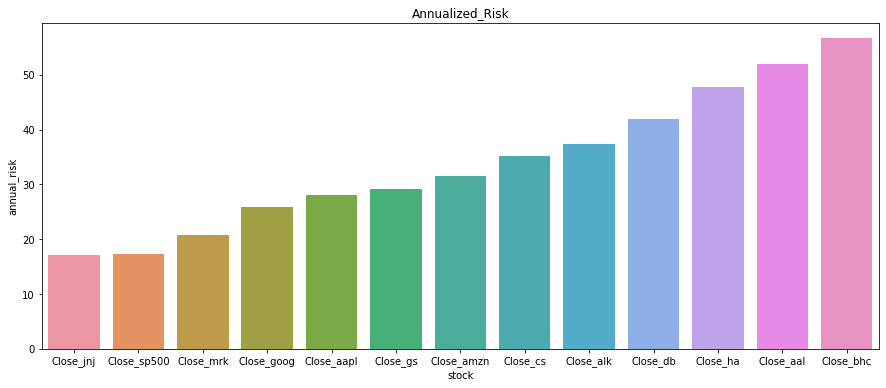

In [76]:
plt.figure(figsize = [15,6])
sns.barplot(x='stock', y='annual_risk', data=annualized_risk)
plt.title("Annualized_Risk")
plt.show()

In [77]:
#portfolio_price_daily_returns.apply(lambda s: s.apply('{0:.2f}'.format)).head()

In [78]:
#portfolio_price_daily_returns.iloc[-1]

In [79]:
#cummulative_returns=portfolio_price_original.iloc[-1]/portfolio_price_original.iloc[1]-1

In [80]:
#cummulative_returns_percentage = cummulative_returns*100

In [81]:
# cummulative_returns_percent = cummulative_returns_percentage.sort_values(ascending=False).reset_index().set_axis(['stock','cummulative_return'], axis=1)
# cummulative_returns_percent.head(15)

In [82]:


# a=pd.concat([cummulative_returns_percent,cummulative_return],axis=1)

In [83]:
# a

In [84]:
portfolio_price_daily_returns_percentage.head()

Close_aal  Close_alk  Close_ha  Close_cs  Close_db  Close_gs  Close_bhc  Close_jnj  Close_mrk  Close_aapl  Close_amzn  Close_goog  Close_sp500
Date                                                                                                                                                      
2010-04-10  -1.829925  -2.450291 -3.523490 -0.740055 -1.596517 -0.765058   0.466023  -0.129558  -0.218574   -1.373360    1.092962   -0.622127    -0.803493
2010-05-10   1.206140   0.597076  1.739130  2.958993  4.240412  2.046803   1.662149   1.832335   1.369113    3.696525    3.526608    3.040103     2.086134
2010-06-10   0.000000  -0.225133  2.051282  0.656257  1.220377  0.849093   1.482897   0.652866  -0.027018    0.086537   -3.400262   -0.720875    -0.067200
2010-07-10   0.108342  -4.615385  3.015075  0.539568 -1.048405  0.179001  -0.337209   0.015823  -0.810589    0.010370    0.559852   -0.812201    -0.164652
2010-08-10  -1.839827   3.634409  0.000000 -1.565296 -0.300193  1.025745   0.902256   0.015816   0.544813    1.676921   -0.460742    1.196196     0.612228

In [85]:
#taking the dependent variable on x axis and the independent variable on the y axis
X = portfolio_price_daily_returns_percentage[['Close_sp500']]
X.head()
y=portfolio_price_daily_returns_percentage[['Close_aal', 'Close_alk', 'Close_ha', 'Close_cs', 
      'Close_db', 'Close_gs', 'Close_bhc', 'Close_jnj', 
      'Close_mrk', 'Close_aapl', 'Close_amzn', 'Close_goog']]

### Splitting the Data into Training and Testing Sets

In [86]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
print(X_train.shape)
y_train.shape

(2012, 1)


(2012, 12)

In [87]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train,y_train)
# print('intercept:', model.intercept_)
# print('slope:', model.coef_)

from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)


Intercept: 
 [-0.05335985  0.0083498  -0.00729507 -0.09367316 -0.09804352 -0.03639921
  0.02369108 -0.00625371  0.01291836  0.03837158  0.07702061  0.01844759]
Coefficients: 
 [[1.34760198]
 [1.24620579]
 [1.24607833]
 [1.32037479]
 [1.47486656]
 [1.28087095]
 [1.28140613]
 [0.66536238]
 [0.74074509]
 [1.07900228]
 [0.98906687]
 [1.0132089 ]]


In [88]:
ind_val = ['Close_aal', 'Close_alk', 'Close_ha', 
                       'Close_cs', 'Close_db', 'Close_gs', 'Close_bhc', 'Close_jnj', 
                       'Close_mrk', 'Close_aapl', 'Close_amzn', 'Close_goog']
#df1=pd.DataFrame(lm.intercept_,index=ind_val,columns=['intercept'])
#df2=pd.DataFrame(lm.coef_,index=ind_val,columns=['beta_values']).reset_index().set_axis(['stock','intercept','beta_values'], axis=1)
#df=pd.concat([df1, df2], axis=1).reset_index().set_axis(['stock','intercept','beta_values'], axis=1)
#df= df.transpose()
df=pd.DataFrame(lm.coef_,index=ind_val).reset_index().set_axis(['stock','beta_values'], axis=1)
df.head(15)

df= df.sort_values(by=['beta_values'],ascending=True)
df

stock  beta_values
7    Close_jnj     0.665362
8    Close_mrk     0.740745
10  Close_amzn     0.989067
11  Close_goog     1.013209
9   Close_aapl     1.079002
2     Close_ha     1.246078
1    Close_alk     1.246206
5     Close_gs     1.280871
6    Close_bhc     1.281406
3     Close_cs     1.320375
0    Close_aal     1.347602
4     Close_db     1.474867

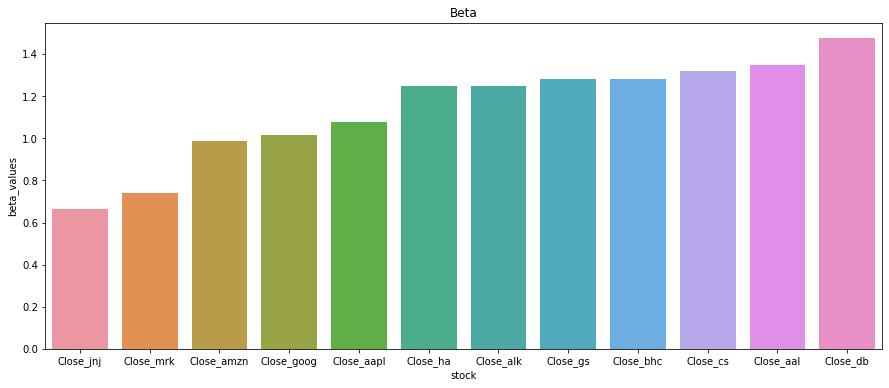

In [89]:
plt.figure(figsize = [15,6])
sns.barplot(x='stock', y='beta_values', data=df)
plt.title("Beta")
plt.show()

In [90]:
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_amzn'])

results = pd.DataFrame({'stock':['Close_amzn'], 'beta': [slope], 'intercept': [intercept]})
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_goog'])
tempResults = pd.DataFrame({'stock':['Close_goog'], 'beta': [slope], 'intercept': [intercept] })
results = pd.concat([results, tempResults])

slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_aapl'])
tempResults = pd.DataFrame({'stock':['Close_aapl'], 'beta': [slope], 'intercept': [intercept] })
results = pd.concat([results, tempResults])
results_tech = results[['stock', 'beta', 'intercept']]
results_tech

stock      beta  intercept
0  Close_amzn  0.998802   0.091025
0  Close_goog  1.013338   0.032308
0  Close_aapl  1.063349   0.060876

In [91]:
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_cs'])

results = pd.DataFrame({'stock':['Close_cs'], 'beta': [slope], 'intercept': [intercept]})
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_db'])
tempResults = pd.DataFrame({'stock':['Close_db'], 'beta': [slope], 'intercept': [intercept] })
results = pd.concat([results, tempResults])

slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_gs'])
tempResults = pd.DataFrame({'stock':['Close_gs'], 'beta': [slope], 'intercept': [intercept] })
results = pd.concat([results, tempResults])
results_finance = results[['stock', 'beta', 'intercept']]
results_finance

stock      beta  intercept
0  Close_cs  1.370002  -0.099346
0  Close_db  1.537546  -0.113162
0  Close_gs  1.301286  -0.034445

In [92]:
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_bhc'])

results = pd.DataFrame({'stock':['Close_bhc'], 'beta': [slope], 'intercept': [intercept]})
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_jnj'])
tempResults = pd.DataFrame({'stock':['Close_jnj'], 'beta': [slope], 'intercept': [intercept] })
results = pd.concat([results, tempResults])

slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_mrk'])
tempResults = pd.DataFrame({'stock':['Close_mrk'], 'beta': [slope], 'intercept': [intercept] })
results = pd.concat([results, tempResults])
results_healthcare = results[['stock', 'beta', 'intercept']]
results_healthcare

stock      beta  intercept
0  Close_bhc  1.315971  -0.017796
0  Close_jnj  0.662233   0.008562
0  Close_mrk  0.733475   0.005235

In [93]:
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_aal'])

results = pd.DataFrame({'stock':['Close_aal'], 'beta': [slope], 'intercept': [intercept]})
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_alk'])
tempResults = pd.DataFrame({'stock':['Close_alk'], 'beta': [slope], 'intercept': [intercept] })
results = pd.concat([results, tempResults])

slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_ha'])
tempResults = pd.DataFrame({'stock':['Close_ha'], 'beta': [slope], 'intercept': [intercept] })
results = pd.concat([results, tempResults])
results_aviation = results[['stock', 'beta', 'intercept']]
results_aviation

stock      beta  intercept
0  Close_aal  1.353609  -0.002365
0  Close_alk  1.231512   0.010856
0   Close_ha  1.233534   0.016326

In [94]:
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_sp500'])
tempResults = pd.DataFrame({'stock':['Close_sp500'], 'beta': [slope], 'intercept': [intercept] })
results = pd.concat([tempResults])
results_sp500 = results[['stock', 'beta', 'intercept']]
results_sp500

stock  beta  intercept
0  Close_sp500   1.0        0.0

In [95]:
result_merge=results_tech.append(results_finance.append(results_healthcare.append(results_aviation.append(results_sp500))))

In [96]:
result_merge.head(15)

stock      beta  intercept
0   Close_amzn  0.998802   0.091025
0   Close_goog  1.013338   0.032308
0   Close_aapl  1.063349   0.060876
0     Close_cs  1.370002  -0.099346
0     Close_db  1.537546  -0.113162
0     Close_gs  1.301286  -0.034445
0    Close_bhc  1.315971  -0.017796
0    Close_jnj  0.662233   0.008562
0    Close_mrk  0.733475   0.005235
0    Close_aal  1.353609  -0.002365
0    Close_alk  1.231512   0.010856
0     Close_ha  1.233534   0.016326
0  Close_sp500  1.000000   0.000000

In [97]:
result_merge.merge(df,on='stock')

stock      beta  intercept  beta_values
0   Close_amzn  0.998802   0.091025     0.989067
1   Close_goog  1.013338   0.032308     1.013209
2   Close_aapl  1.063349   0.060876     1.079002
3     Close_cs  1.370002  -0.099346     1.320375
4     Close_db  1.537546  -0.113162     1.474867
5     Close_gs  1.301286  -0.034445     1.280871
6    Close_bhc  1.315971  -0.017796     1.281406
7    Close_jnj  0.662233   0.008562     0.665362
8    Close_mrk  0.733475   0.005235     0.740745
9    Close_aal  1.353609  -0.002365     1.347602
10   Close_alk  1.231512   0.010856     1.246206
11    Close_ha  1.233534   0.016326     1.246078

In [98]:
result_merge.drop(columns=['intercept'],axis=1).sort_values(by='beta',ascending=False)

stock      beta
0     Close_db  1.537546
0     Close_cs  1.370002
0    Close_aal  1.353609
0    Close_bhc  1.315971
0     Close_gs  1.301286
0     Close_ha  1.233534
0    Close_alk  1.231512
0   Close_aapl  1.063349
0   Close_goog  1.013338
0  Close_sp500  1.000000
0   Close_amzn  0.998802
0    Close_mrk  0.733475
0    Close_jnj  0.662233

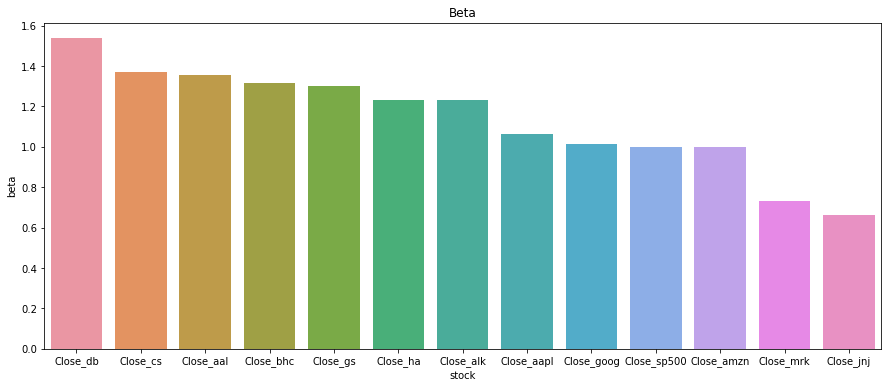

In [99]:
plt.figure(figsize = [15,6])
sns.barplot(x='stock', y='beta', data=result_merge.sort_values(by='beta',ascending=False))
plt.title("Beta")
plt.show()

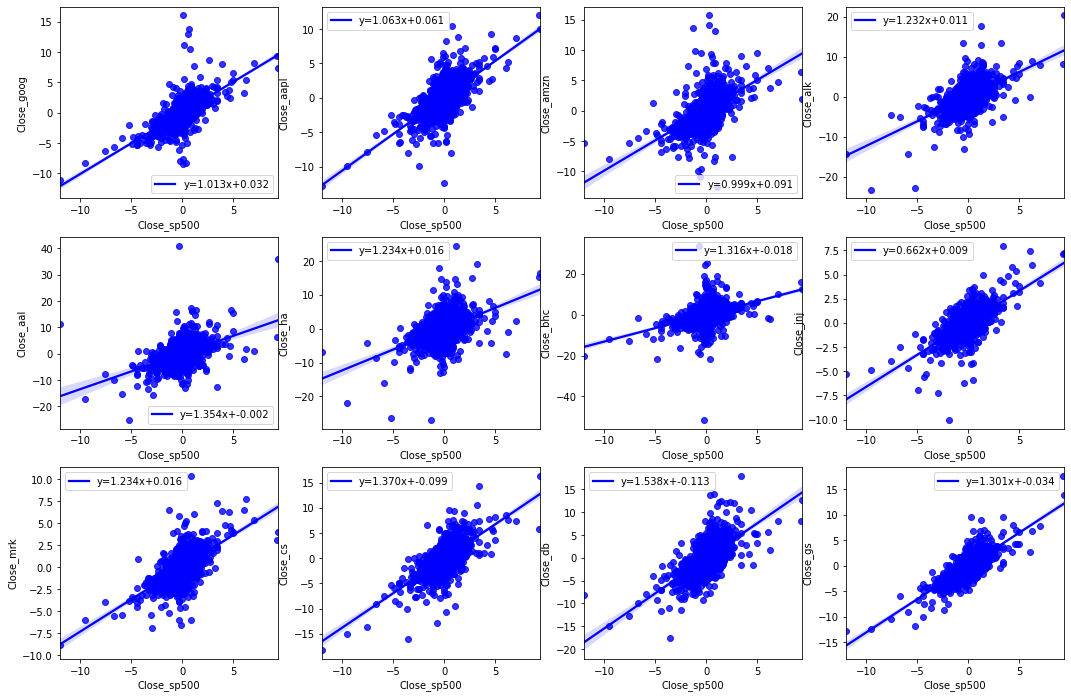

In [100]:
plt.figure(figsize = [18,12])
plt.tight_layout(pad=1.0)
plt.subplot(3,4,1)
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_goog'])
sns.regplot(x="Close_sp500", y="Close_goog", data=portfolio_price_daily_returns_percentage, color='b', 
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})

plt.legend()
plt.subplot(3,4,2)
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_aapl'])
sns.regplot(x="Close_sp500", y="Close_aapl", data=portfolio_price_daily_returns_percentage, color='b', 
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
plt.legend()

plt.subplot(3,4,3)
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_amzn'])
sns.regplot(x="Close_sp500", y="Close_amzn", data=portfolio_price_daily_returns_percentage, color='b', 
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
plt.legend()

plt.subplot(3,4,4)
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_alk'])
sns.regplot(x="Close_sp500", y="Close_alk", data=portfolio_price_daily_returns_percentage, color='b', 
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
plt.legend()
plt.subplot(3,4,5)
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_aal'])
sns.regplot(x="Close_sp500", y="Close_aal", data=portfolio_price_daily_returns_percentage, color='b', 
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
plt.legend()
plt.subplot(3,4,6)
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_ha'])
sns.regplot(x="Close_sp500", y="Close_ha", data=portfolio_price_daily_returns_percentage, color='b', 
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
plt.legend()

plt.subplot(3,4,7)
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_bhc'])
sns.regplot(x="Close_sp500", y="Close_bhc", data=portfolio_price_daily_returns_percentage, color='b', 
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
plt.legend()
plt.subplot(3,4,8)
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_jnj'])
sns.regplot(x="Close_sp500", y="Close_jnj", data=portfolio_price_daily_returns_percentage, color='b', 
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
plt.legend()
plt.subplot(3,4,9)
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_ha'])
sns.regplot(x="Close_sp500", y="Close_mrk", data=portfolio_price_daily_returns_percentage, color='b', 
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
plt.legend()
plt.subplot(3,4,10)
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_cs'])
sns.regplot(x="Close_sp500", y="Close_cs", data=portfolio_price_daily_returns_percentage, color='b', 
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
plt.legend()
plt.subplot(3,4,11)
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_db'])
sns.regplot(x="Close_sp500", y="Close_db", data=portfolio_price_daily_returns_percentage, color='b', 
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
plt.legend()
plt.subplot(3,4,12)
slope, intercept, r_value, p_value, std_err = stats.linregress(portfolio_price_daily_returns_percentage['Close_sp500']
                                                               ,portfolio_price_daily_returns_percentage['Close_gs'])
sns.regplot(x="Close_sp500", y="Close_gs", data=portfolio_price_daily_returns_percentage, color='b', 
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
plt.legend()
#plt.ylabel("y",labelpad=5)
plt.show()

In [101]:
portfolio_returns = pd.merge(pd.merge(pd.merge(pd.merge(df,cummulative_return,on='stock',how='outer'),annualized_risk,on='stock',how='outer'),annualized_returns,on='stock',how='outer'),result_merge,on='stock',how='outer')

In [102]:
portfolio_returns.head(15)

stock  beta_values  cumm_return  annual_risk  annual_return      beta  intercept
0     Close_jnj     0.665362       141.10    17.218738      10.300879  0.662233   0.008562
1     Close_mrk     0.740745       126.64    20.714241      10.338527  0.733475   0.005235
2    Close_amzn     0.989067      1948.49    31.573504      35.220120  0.998802   0.091025
3    Close_goog     1.013209       461.28    25.856093      20.602336  1.013338   0.032308
4    Close_aapl     1.079002      1047.77    28.127302      28.416386  1.063349   0.060876
5      Close_ha     1.246078       116.28    47.857323      19.282441  1.233534   0.016326
6     Close_alk     1.246206       194.28    37.404274      17.879160  1.231512   0.010856
7      Close_gs     1.280871        36.07    29.099614       7.321234  1.301286  -0.034445
8     Close_bhc     1.281406       -39.65    56.671428      11.697321  1.315971  -0.017796
9      Close_cs     1.320375       -76.39    35.250863      -8.188845  1.370002  -0.099346
10    Close_aal     1.347602        32.29    51.950444      16.048889  1.353609  -0.002365
11     Close_db     1.474867       -84.03    41.867595      -9.610244  1.537546  -0.113162
12  Close_sp500          NaN       193.39    17.357439      12.296594  1.000000   0.000000

In [103]:
portfolio_returns.columns

Index(['stock', 'beta_values', 'cumm_return', 'annual_risk', 'annual_return', 'beta', 'intercept'], dtype='object')

In [104]:
portfolio_returns.iloc[12][4]

12.296594451619795

In [105]:
risk_free_return=0.75
portfolio_returns['expected_returns'] =  risk_free_return+ (portfolio_returns['beta']*(portfolio_returns.iloc[12][4]- risk_free_return))

In [151]:
portfolio_returns.dtypes

beta_values         float64
cumm_return         float64
annual_risk         float64
annual_return       float64
beta                float64
intercept           float64
expected_returns    float64
dtype: object

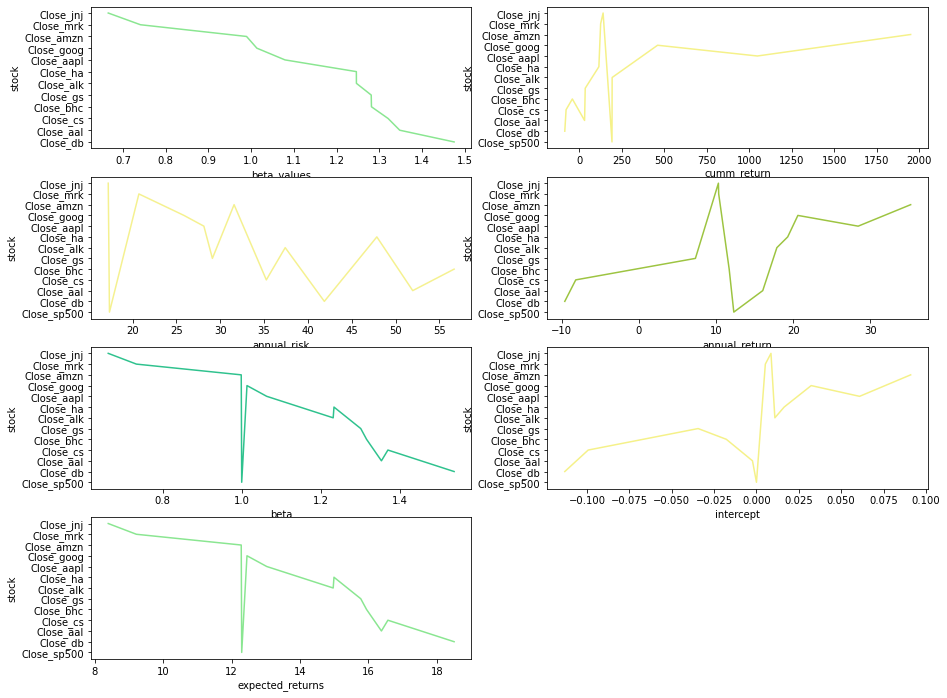

In [106]:
plt.figure(figsize = [15,12])
plt.subplot(4,2,1)
sns.lineplot(data = portfolio_returns, y = "stock",x = "beta_values",color="#8ae691")
plt.subplot(4,2,2)
sns.lineplot(data = portfolio_returns, y = "stock",x = "cumm_return",color="#f5f189")
plt.subplot(4,2,3)
sns.lineplot(data = portfolio_returns, y = "stock",x = "annual_risk",color="#f5f190")
plt.subplot(4,2,4)
sns.lineplot(data = portfolio_returns, y = "stock",x = "annual_return",color="#9dc441")
plt.subplot(4,2,5)
sns.lineplot(data = portfolio_returns, y = "stock",x = "beta",color="#2fc28e")
plt.subplot(4,2,6)
sns.lineplot(data = portfolio_returns, y = "stock",x = "intercept",color="#f5f189")
plt.subplot(4,2,7)
sns.lineplot(data = portfolio_returns, y = "stock",x = "expected_returns",color="#8ae691")
plt.show()

In [107]:
portfolio_returns= portfolio_returns.set_index('stock')
portfolio_returns.head(15)

beta_values  cumm_return  annual_risk  annual_return      beta  intercept  expected_returns
stock                                                                                                   
Close_jnj       0.665362       141.10    17.218738      10.300879  0.662233   0.008562          8.396536
Close_mrk       0.740745       126.64    20.714241      10.338527  0.733475   0.005235          9.219144
Close_amzn      0.989067      1948.49    31.573504      35.220120  0.998802   0.091025         12.282765
Close_goog      1.013209       461.28    25.856093      20.602336  1.013338   0.032308         12.450603
Close_aapl      1.079002      1047.77    28.127302      28.416386  1.063349   0.060876         13.028061
Close_ha        1.246078       116.28    47.857323      19.282441  1.233534   0.016326         14.993116
Close_alk       1.246206       194.28    37.404274      17.879160  1.231512   0.010856         14.969765
Close_gs        1.280871        36.07    29.099614       7.321234  1.301286  -0.034445         15.775418
Close_bhc       1.281406       -39.65    56.671428      11.697321  1.315971  -0.017796         15.944984
Close_cs        1.320375       -76.39    35.250863      -8.188845  1.370002  -0.099346         16.568857
Close_aal       1.347602        32.29    51.950444      16.048889  1.353609  -0.002365         16.379580
Close_db        1.474867       -84.03    41.867595      -9.610244  1.537546  -0.113162         18.503421
Close_sp500          NaN       193.39    17.357439      12.296594  1.000000   0.000000         12.296594

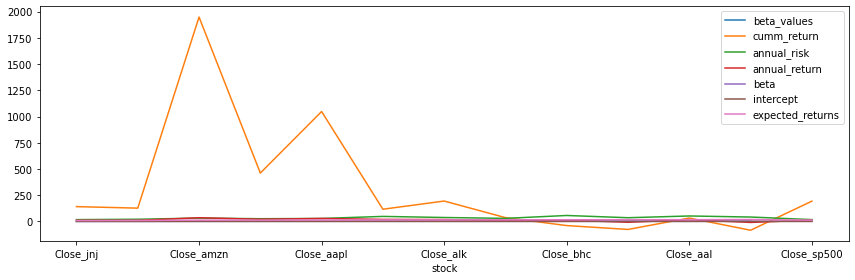

In [108]:
portfolio_returns.plot(figsize=(12,4));
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [109]:
portfolio_returns.to_csv("portfolio_returns.csv")

In [110]:
portfolio_returns.reset_index().sort_values(['beta','cumm_return','annual_return','expected_returns','annual_risk'],ascending=[False,False,False,False,False])

stock  beta_values  cumm_return  annual_risk  annual_return      beta  intercept  expected_returns
11     Close_db     1.474867       -84.03    41.867595      -9.610244  1.537546  -0.113162         18.503421
9      Close_cs     1.320375       -76.39    35.250863      -8.188845  1.370002  -0.099346         16.568857
10    Close_aal     1.347602        32.29    51.950444      16.048889  1.353609  -0.002365         16.379580
8     Close_bhc     1.281406       -39.65    56.671428      11.697321  1.315971  -0.017796         15.944984
7      Close_gs     1.280871        36.07    29.099614       7.321234  1.301286  -0.034445         15.775418
5      Close_ha     1.246078       116.28    47.857323      19.282441  1.233534   0.016326         14.993116
6     Close_alk     1.246206       194.28    37.404274      17.879160  1.231512   0.010856         14.969765
4    Close_aapl     1.079002      1047.77    28.127302      28.416386  1.063349   0.060876         13.028061
3    Close_goog     1.013209       461.28    25.856093      20.602336  1.013338   0.032308         12.450603
12  Close_sp500          NaN       193.39    17.357439      12.296594  1.000000   0.000000         12.296594
2    Close_amzn     0.989067      1948.49    31.573504      35.220120  0.998802   0.091025         12.282765
1     Close_mrk     0.740745       126.64    20.714241      10.338527  0.733475   0.005235          9.219144
0     Close_jnj     0.665362       141.10    17.218738      10.300879  0.662233   0.008562          8.396536

In [111]:
portfolio_returns.replace(np.NaN,1,inplace=True)

In [112]:
portfolio_returns.head(15)

beta_values  cumm_return  annual_risk  annual_return      beta  intercept  expected_returns
stock                                                                                                   
Close_jnj       0.665362       141.10    17.218738      10.300879  0.662233   0.008562          8.396536
Close_mrk       0.740745       126.64    20.714241      10.338527  0.733475   0.005235          9.219144
Close_amzn      0.989067      1948.49    31.573504      35.220120  0.998802   0.091025         12.282765
Close_goog      1.013209       461.28    25.856093      20.602336  1.013338   0.032308         12.450603
Close_aapl      1.079002      1047.77    28.127302      28.416386  1.063349   0.060876         13.028061
Close_ha        1.246078       116.28    47.857323      19.282441  1.233534   0.016326         14.993116
Close_alk       1.246206       194.28    37.404274      17.879160  1.231512   0.010856         14.969765
Close_gs        1.280871        36.07    29.099614       7.321234  1.301286  -0.034445         15.775418
Close_bhc       1.281406       -39.65    56.671428      11.697321  1.315971  -0.017796         15.944984
Close_cs        1.320375       -76.39    35.250863      -8.188845  1.370002  -0.099346         16.568857
Close_aal       1.347602        32.29    51.950444      16.048889  1.353609  -0.002365         16.379580
Close_db        1.474867       -84.03    41.867595      -9.610244  1.537546  -0.113162         18.503421
Close_sp500     1.000000       193.39    17.357439      12.296594  1.000000   0.000000         12.296594

In [113]:
#portfolio_returns[(portfolio_returns >=0).all(1)]

In [114]:
portfolio_returns.reset_index()

stock  beta_values  cumm_return  annual_risk  annual_return      beta  intercept  expected_returns
0     Close_jnj     0.665362       141.10    17.218738      10.300879  0.662233   0.008562          8.396536
1     Close_mrk     0.740745       126.64    20.714241      10.338527  0.733475   0.005235          9.219144
2    Close_amzn     0.989067      1948.49    31.573504      35.220120  0.998802   0.091025         12.282765
3    Close_goog     1.013209       461.28    25.856093      20.602336  1.013338   0.032308         12.450603
4    Close_aapl     1.079002      1047.77    28.127302      28.416386  1.063349   0.060876         13.028061
5      Close_ha     1.246078       116.28    47.857323      19.282441  1.233534   0.016326         14.993116
6     Close_alk     1.246206       194.28    37.404274      17.879160  1.231512   0.010856         14.969765
7      Close_gs     1.280871        36.07    29.099614       7.321234  1.301286  -0.034445         15.775418
8     Close_bhc     1.281406       -39.65    56.671428      11.697321  1.315971  -0.017796         15.944984
9      Close_cs     1.320375       -76.39    35.250863      -8.188845  1.370002  -0.099346         16.568857
10    Close_aal     1.347602        32.29    51.950444      16.048889  1.353609  -0.002365         16.379580
11     Close_db     1.474867       -84.03    41.867595      -9.610244  1.537546  -0.113162         18.503421
12  Close_sp500     1.000000       193.39    17.357439      12.296594  1.000000   0.000000         12.296594

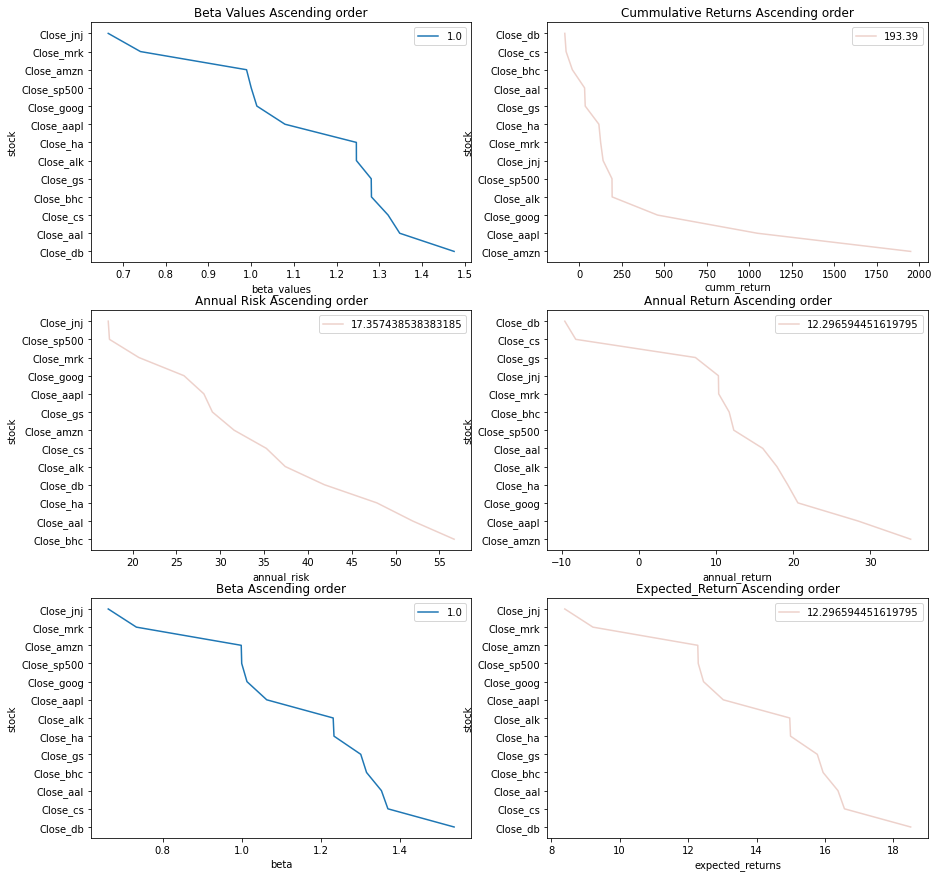

In [115]:
plt.figure(figsize = [15,15])
plt.subplot(3,2,1)
sns.lineplot(data = portfolio_returns.sort_values(by=['beta_values'],ascending=True), y = "stock",x = "beta_values",color="#8ae691",hue=portfolio_returns.iloc[12][0])
plt.title('Beta Values Ascending order')
plt.subplot(3,2,2)
sns.lineplot(data = portfolio_returns.sort_values(by=['cumm_return'],ascending=True), y = "stock",x = "cumm_return",color="#f5f189",hue=portfolio_returns.iloc[12][1])
plt.title('Cummulative Returns Ascending order')
plt.subplot(3,2,3)
sns.lineplot(data = portfolio_returns.sort_values(by=['annual_risk'],ascending=True), y = "stock",x = "annual_risk",color="#f5f190",hue=portfolio_returns.iloc[12][2])
plt.title('Annual Risk Ascending order')
plt.subplot(3,2,4)
sns.lineplot(data = portfolio_returns.sort_values(by=['annual_return'],ascending=True), y = "stock",x = "annual_return",color="#9dc441",hue=portfolio_returns.iloc[12][3])
plt.title('Annual Return Ascending order')
plt.subplot(3,2,5)
sns.lineplot(data = portfolio_returns.sort_values(by=['beta'],ascending=True), y = "stock",x = "beta",color="#2fc28e",hue=portfolio_returns.iloc[12][4])
# plt.subplot(3,2,6)
# sns.lineplot(data = portfolio_returns.sort_values(by=['intercept'],ascending=False), y = "stock",x = "intercept",color="#f5f189")
plt.title('Beta Ascending order')
plt.subplot(3,2,6)
sns.lineplot(data = portfolio_returns.sort_values(by=['expected_returns'],ascending=True), y = "stock",x = "expected_returns",color="#8ae691",hue=portfolio_returns.iloc[12][6])
plt.title('Expected_Return Ascending order')
plt.show()

In [116]:
portfolio_privol=portfolio[['Date','Close_aal', 'Close_alk', 'Close_ha', 'Close_cs', 'Close_db', 
                            'Close_gs', 'Close_bhc', 'Close_jnj', 'Close_mrk', 'Close_aapl', 
                            'Close_amzn', 'Close_goog', 'Close_sp500',
                            'Volume_aapl', 'Volume_amzn', 'Volume_goog', 'Volume_sp500', 
                            'Volume_aal', 'Volume_alk', 'Volume_ha', 'Volume_cs', 'Volume_db', 
                            'Volume_gs', 'Volume_bhc', 'Volume_jnj', 'Volume_mrk']]

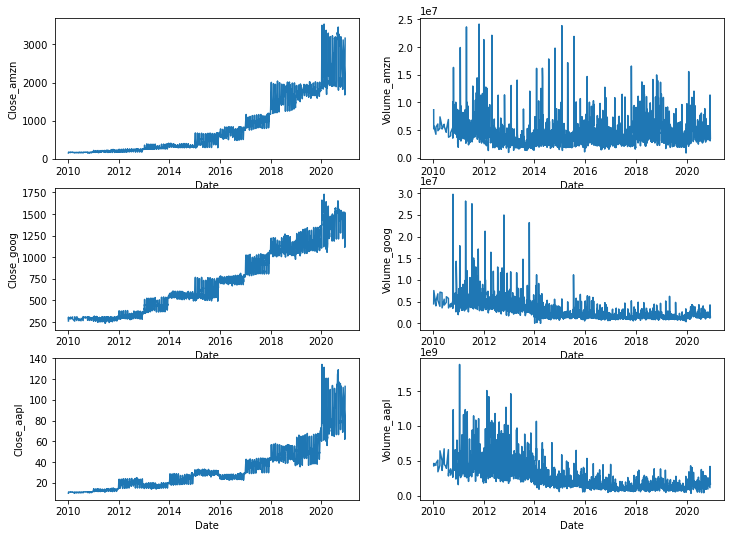

In [117]:
plt.figure(figsize = [12,12])
plt.subplot(4,2,1)
sns.lineplot(data = portfolio_privol, x = "Date",y="Close_amzn")
plt.subplot(4,2,2)
sns.lineplot(data = portfolio_privol,  x = "Date",y="Volume_amzn")
plt.subplot(4,2,3)
sns.lineplot(data = portfolio_privol, x = "Date",y="Close_goog")
plt.subplot(4,2,4)
sns.lineplot(data = portfolio_privol,  x = "Date",y="Volume_goog")
plt.subplot(4,2,5)
sns.lineplot(data = portfolio_privol, x = "Date",y="Close_aapl")
plt.subplot(4,2,6)
sns.lineplot(data = portfolio_privol,  x = "Date",y="Volume_aapl")
plt.show()

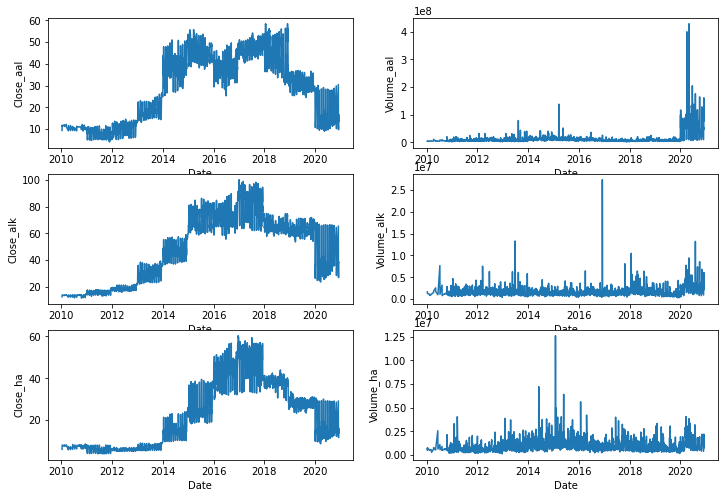

In [118]:
plt.figure(figsize = [12,11])
plt.subplot(4,2,1)
sns.lineplot(data = portfolio_privol, x = "Date",y="Close_aal")
plt.subplot(4,2,2)
sns.lineplot(data = portfolio_privol,  x = "Date",y="Volume_aal")
plt.subplot(4,2,3)
sns.lineplot(data = portfolio_privol, x = "Date",y="Close_alk")
plt.subplot(4,2,4)
sns.lineplot(data = portfolio_privol,  x = "Date",y="Volume_alk")
plt.subplot(4,2,5)
sns.lineplot(data = portfolio_privol, x = "Date",y="Close_ha")
plt.subplot(4,2,6)
sns.lineplot(data = portfolio_privol,  x = "Date",y="Volume_ha")
plt.show()

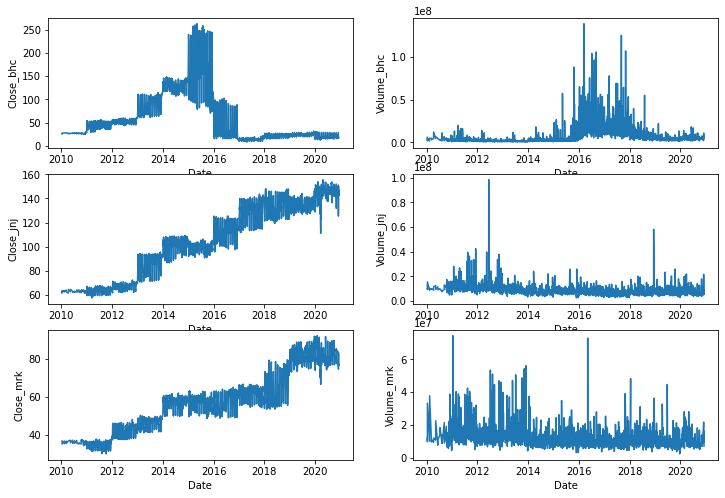

In [119]:
plt.figure(figsize = [12,11])
plt.subplot(4,2,1)
sns.lineplot(data = portfolio_privol, x = "Date",y="Close_bhc")
plt.subplot(4,2,2)
sns.lineplot(data = portfolio_privol,  x = "Date",y="Volume_bhc")
plt.subplot(4,2,3)
sns.lineplot(data = portfolio_privol, x = "Date",y="Close_jnj")
plt.subplot(4,2,4)
sns.lineplot(data = portfolio_privol,  x = "Date",y="Volume_jnj")
plt.subplot(4,2,5)
sns.lineplot(data = portfolio_privol, x = "Date",y="Close_mrk")
plt.subplot(4,2,6)
sns.lineplot(data = portfolio_privol,  x = "Date",y="Volume_mrk")
plt.show()

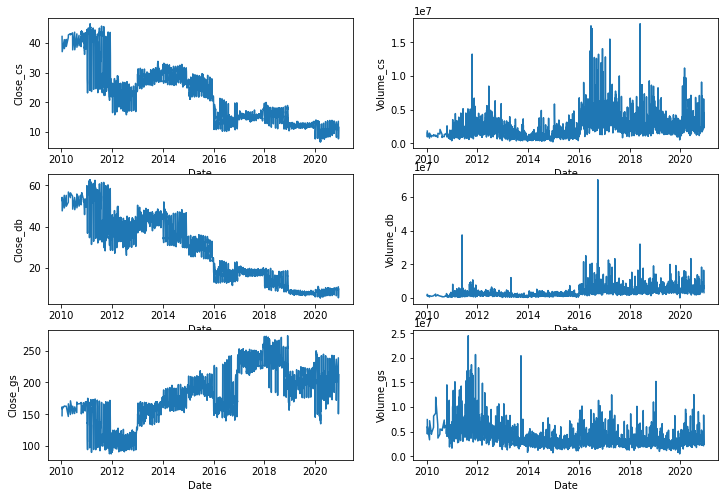

In [120]:
plt.figure(figsize = [12,11])
plt.subplot(4,2,1)
sns.lineplot(data = portfolio_privol, x = "Date",y="Close_cs")
plt.subplot(4,2,2)
sns.lineplot(data = portfolio_privol,  x = "Date",y="Volume_cs")
plt.subplot(4,2,3)
sns.lineplot(data = portfolio_privol, x = "Date",y="Close_db")
plt.subplot(4,2,4)
sns.lineplot(data = portfolio_privol,  x = "Date",y="Volume_db")
plt.subplot(4,2,5)
sns.lineplot(data = portfolio_privol, x = "Date",y="Close_gs")
plt.subplot(4,2,6)
sns.lineplot(data = portfolio_privol,  x = "Date",y="Volume_gs")
plt.show()

In [121]:
portfolio_selected = portfolio_price_original[['Close_aapl' ,'Close_jnj','Close_mrk']]

In [122]:
portfolio_selected.head()

Close_aapl  Close_jnj  Close_mrk
Date                                        
2010-01-10   10.090000  61.750000  36.599998
2010-04-10    9.951428  61.669998  36.520000
2010-05-10   10.319285  62.799999  37.020000
2010-06-10   10.328215  63.209999  37.009998
2010-07-10   10.329286  63.220001  36.709999

In [123]:
#Initial weight for each stock in order
stocks =['Close_aapl' ,'Close_jnj','Close_mrk']
initial_weight = np.array([0.33, 0.33,0.33])

### Daily return from each stock

Daily return is the percentage change in the price of the stock from the previous day. This can be calculated using the percentage change in the price on a daily basis.

In [124]:
# Daily return from each stock 
return_stocks = portfolio_selected.pct_change()
return_stocks.head(5)

Close_aapl  Close_jnj  Close_mrk
Date                                        
2010-01-10         NaN        NaN        NaN
2010-04-10   -0.013734  -0.001296  -0.002186
2010-05-10    0.036965   0.018323   0.013691
2010-06-10    0.000865   0.006529  -0.000270
2010-07-10    0.000104   0.000158  -0.008106

### Average daily return from each stock


Average daily return for each stock can be calculated using the dataframe created above - "return_stocks"

In [125]:
# Average daily return from each stock
daily_returns_mean = return_stocks.mean()
print(daily_returns_mean)

Close_aapl    0.001128
Close_jnj     0.000409
Close_mrk     0.000410
dtype: float64


### Total Portfolio Return

In [126]:
allocated_daily_returns = (initial_weight * daily_returns_mean)
portfolio_return = np.sum(allocated_daily_returns)
print(portfolio_return)

0.0006423972786865847


### Daily return from the portfolio

The weighted average can be calculated to determine the return from the portfolio on a daily basis.

In [127]:
# Portfolio daily returns
return_stocks['Portfolio_Daily_Return'] = return_stocks.dot(initial_weight)
return_stocks.tail(5)

Close_aapl  Close_jnj  Close_mrk  Portfolio_Daily_Return
Date                                                                
2020-09-24    0.010269   0.001592   0.006293                0.005991
2020-09-25    0.037516   0.006843  -0.002646                0.013765
2020-09-28    0.023869   0.009955  -0.002050                0.010485
2020-09-29   -0.007568  -0.000340  -0.010391               -0.006039
2020-09-30    0.015076   0.012376   0.012820                0.013290

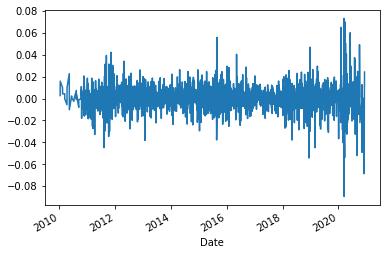

In [128]:
# Plot
return_stocks['Portfolio_Daily_Return'].plot()
plt.show()

As seen in the plot, the portfolio shows larger variation in prices in 2020.

In [129]:
# Cumulative return from the portfolio
Cumulative_returns_daily = (1+return_stocks).cumprod()
Cumulative_returns_daily.tail(5)

Close_aapl  Close_jnj  Close_mrk  Portfolio_Daily_Return
Date                                                                
2020-09-24   10.725471   2.342834   2.271858                4.217696
2020-09-25   11.127849   2.358866   2.265847                4.275755
2020-09-28   11.393459   2.382348   2.261202                4.320587
2020-09-29   11.307234   2.381538   2.237705                4.294496
2020-09-30   11.477700   2.411012   2.266393                4.351569

In [130]:
Cumulative_returns_daily.Portfolio_Daily_Return.iloc[-1]-1

3.351569371501599

This suggests that the portfolio has achieved a cumulative return of 388% in the given period.

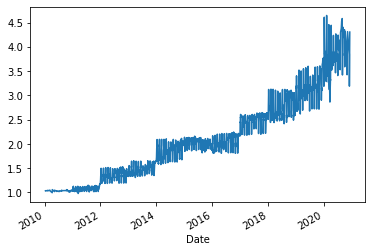

In [131]:
# Plot
Cumulative_returns_daily['Portfolio_Daily_Return'].plot()
plt.show()

### Portfolio Risk – Portfolio Standard Deviation

By looking into the portfolio standard deviation formula, we need three elements:
- Portfolio weight array
- Portfolio covariance matrix
- Transpose of portfolio weight array

The weight for each stock in the portfolio is already abailable. We need to calculate the daily covariance. Remember, the covariance must be annualised by **multiplying with 252 (the trading days in a year)**.


In [132]:
# Covariance matrix for the portfolio

# Removing the last column (Portfolio_Daily_Return) from our calculation.
covariance_portfolio = return_stocks.iloc[:,:-1]
covariance_portfolio = (covariance_portfolio.cov())*252

covariance_portfolio

Close_aapl  Close_jnj  Close_mrk
Close_aapl    0.079115   0.018014   0.019160
Close_jnj     0.018014   0.029648   0.020663
Close_mrk     0.019160   0.020663   0.042908

In [133]:
# Applying the matrix operations mentioned in the image above
portfolio_variance = np.dot(initial_weight.T,np.dot(covariance_portfolio, initial_weight))

In [134]:
# Standard deviation (risk of portfolio)
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.17062738726830562

### Sharpe Ratio

In [135]:
# Assuming that the risk free rate is zero
Sharpe_Ratio = return_stocks['Portfolio_Daily_Return'].mean() / return_stocks['Portfolio_Daily_Return'].std()
Sharpe_Ratio

0.059766141984115104

In [136]:
Annualised_Sharpe_Ratio = (252**0.5)*Sharpe_Ratio
Annualised_Sharpe_Ratio

0.94875809107047

### Stationarity Tests

In [137]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for stationarity
# Creating a function for testing all the columns

from statsmodels.tsa.stattools import kpss

for col in portfolio_selected.columns:
    kpss_test = kpss(portfolio_selected[col])
    
    print(col)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        
    print('\n--------------------------------------\n')

Close_aapl
KPSS Statistic: 6.756153
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

Close_jnj
KPSS Statistic: 8.709663
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

Close_mrk
KPSS Statistic: 7.831671
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------



C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


All the series are stationary. Hence, differencing is required not for any columns. However, in case of non-stationarity, all the variables (stationary and non-stationary) must undergo differencing.

### Train-test split

In [138]:
# Keeping 70% values as train
train_len = int(portfolio_selected.shape[0]*0.7)
test_len = int(portfolio_selected.shape[0]) - int(portfolio_selected.shape[0]*0.7)

# Train portfolio_returns
train_data = portfolio_selected[:train_len] 

# Test portfolio_returns
test_data = portfolio_selected[train_len:]

In [139]:
portfolio_selected.head()

Close_aapl  Close_jnj  Close_mrk
Date                                        
2010-01-10   10.090000  61.750000  36.599998
2010-04-10    9.951428  61.669998  36.520000
2010-05-10   10.319285  62.799999  37.020000
2010-06-10   10.328215  63.209999  37.009998
2010-07-10   10.329286  63.220001  36.709999

In [140]:
train_data.shape

(1761, 3)

### Model Fitting

In [141]:
# Fitting the VAR model to the data
from statsmodels.tsa.api import VAR

model = VAR(train_data)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [142]:
model_fit = model.fit()

# To select the lag order
x = model.select_order(maxlags=50)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [143]:
# Providing maxlags as 26 (minimum AIC vaue)
results = model.fit(maxlags = 1, ic = 'aic')

In [144]:
# Printing the results - Evaluation parameters, lag coefficients, etc.
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 05, Apr, 2021
Time:                     23:01:12
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -3.88041
Nobs:                     1760.00    HQIC:                  -3.90393
Log likelihood:          -4032.40    FPE:                  0.0198863
AIC:                     -3.91772    Det(Omega_mle):       0.0197513
--------------------------------------------------------------------
Results for equation Close_aapl
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.024946         0.047325           -0.527           0.598
L1.Close_aapl         0.995605         0.002219          448.739           0.000
L1.Close_jnj          0.001402         0.001202        

In [145]:
# Forecasting using the VAR model
# Selecting the lag value from the above results
lag_order = 1

In [146]:
# Obtaining the forecast values
predicted = results.forecast(train_data.values[-lag_order:], test_len)
forecast = pd.DataFrame(predicted, index = portfolio_selected.index[train_len:], columns = portfolio_selected.columns)

### Model Evaluation

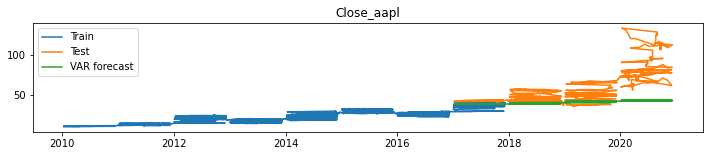

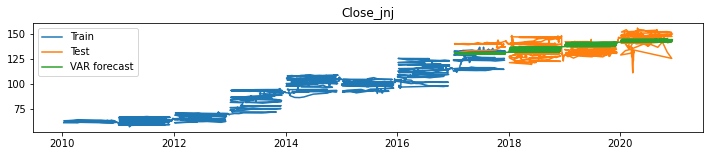

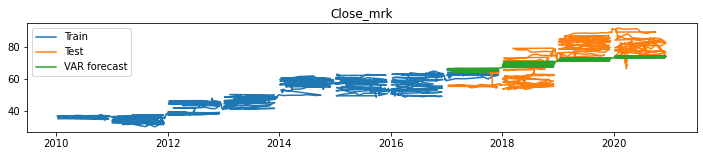

In [147]:
# Printing the train, test and forecasted values
for col in portfolio_selected.columns:
    plt.figure(figsize=(12,2))
    plt.plot(portfolio_selected[col][:train_len], label='Train')
    plt.plot(portfolio_selected[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()

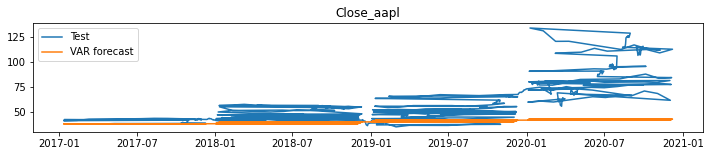

<Figure size 432x288 with 0 Axes>

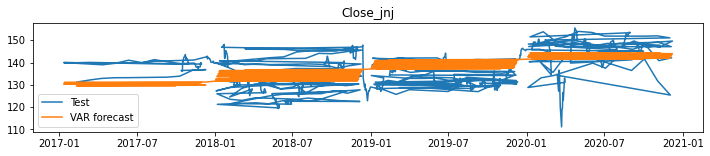

<Figure size 432x288 with 0 Axes>

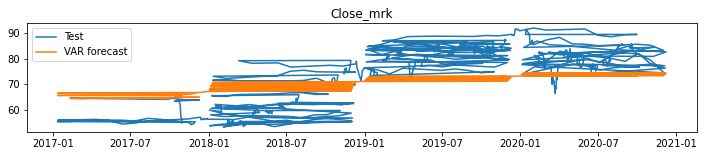

<Figure size 432x288 with 0 Axes>

In [148]:
# Comparing the test and forecasted values
for col in portfolio_selected.columns:
    plt.figure(figsize=(12,2))
    plt.plot(portfolio_selected[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()
    plt.savefig('plot1.png', dpi=300, bbox_inches='tight')

In [149]:
from sklearn.metrics import mean_squared_error

eval_results = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])
tempResults = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])

for col in portfolio_selected.columns:
    rmse = np.sqrt(mean_squared_error(test_data[col], forecast[col][:])).round(2)
    mape = np.round(np.mean(np.abs(test_data[col]-forecast[col][:])/test_data[col])*100,2)

    tempResults = pd.DataFrame({'Column':[col], 'RMSE': [rmse],'MAPE': [mape] })
    eval_results = pd.concat([eval_results, tempResults])
    
eval_results


Column   RMSE   MAPE
0  Close_aapl  25.61  24.44
0   Close_jnj   7.38   4.52
0   Close_mrk   9.31  11.35

In [150]:
portfolio_selected.describe()

Close_aapl    Close_jnj    Close_mrk
count  2517.000000  2517.000000  2517.000000
mean     33.454670   105.277378    57.161053
std      20.630118    28.174233    15.164505
min       9.951428    57.660000    29.809999
25%      18.961428    81.930000    45.730000
50%      27.592501   104.040001    57.180000
75%      42.962502   130.979996    64.089996
max     134.179993   155.509995    92.040001